- CUSTID: Identification of Credit Cardholder (Categorical)
- BALANCE: Balance amount left in their account to make purchases
- BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently -updated)
- PURCHASES: Amount of purchases made from the account
- ONEOFFPURCHASES: Maximum purchase amount did in one-go
- INSTALLMENTSPURCHASES: Amount of purchase done in installment
- CASH ADVANCE: Cash in advance given by the user
- PURCHASESFREQUENCY: How frequently the Purchases are being made score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY: How frequently the cash in advance being paid
- CASHADVANCETRX: Number of Transactions made with “Cash in Advanced”
- PURCHASESTRX: Number of purchase transactions made
- CREDIT LIMIT: Limit of Credit Card for user
- PAYMENTS: Amount of Payment done by the user
- MINIMUM_PAYMENTS: Minimum amount of payments made by the user
- PRCFULLPAYMENT: Percent of full payment paid by the user
- TENURE: Tenure of credit card service for user

## 1. Import Libraries

In [613]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

In [614]:
from sklearn.preprocessing import StandardScaler, PowerTransformer, OrdinalEncoder, RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, FactorAnalyzer, calculate_kmo
from sklearn.ensemble import IsolationForest
from kneed import KneeLocator
import pingouin as pg

In [615]:
#SKlearn & other ML Packages
import shap
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score, log_loss, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.inspection import permutation_importance
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [616]:
import warnings
warnings.filterwarnings(action="ignore")

## 2. Data

In [617]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [618]:
df.shape

(8950, 18)

In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [620]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [621]:
#Check for missing/NULL values
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [622]:
df[['PAYMENTS', 'MINIMUM_PAYMENTS']][df['MINIMUM_PAYMENTS'].isna()]

,PAYMENTS,MINIMUM_PAYMENTS
3,0.000000,NaN
45,0.000000,NaN
47,0.000000,NaN
54,417.016763,NaN
55,0.000000,NaN
...,...,...
8919,0.000000,NaN
8929,0.000000,NaN
8935,0.000000,NaN
8944,0.000000,NaN


In [623]:
#Since all CUST_ID are truly unique, we can drop the column on cust_id
df = df.drop(['CUST_ID'], axis = 1)

#Patching the null values
df = df.dropna(subset = ['CREDIT_LIMIT'])

#patching null values in data set using KNNImputer to avoid bias
null_columns = ['MINIMUM_PAYMENTS']

imputer = KNNImputer()
patches = pd.DataFrame(imputer.fit_transform(df[null_columns]), columns = null_columns)
df = df.fillna(patches)

In [624]:
#check for dupes
df.duplicated().sum()

0

In [625]:
#Monthly Average Purchase over the period the customer has been using the card
df['avg_monthly_purchase'] = df['PURCHASES']/df['TENURE']
                                  
#Monthly Average Cash Advance over the period the customer has been using the card
df['avg_monthly_cash'] = df['CASH_ADVANCE']/df['TENURE']

#Monthly Average Payments over the period the customer has been using the card
df['avg_monthly_installments'] = df['INSTALLMENTS_PURCHASES']/df['TENURE']

#Utilization rate of Credit Card
df['utilisation_ratio'] = df['BALANCE']/df['CREDIT_LIMIT']

In [626]:
df[df['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4301

## 3. EDA

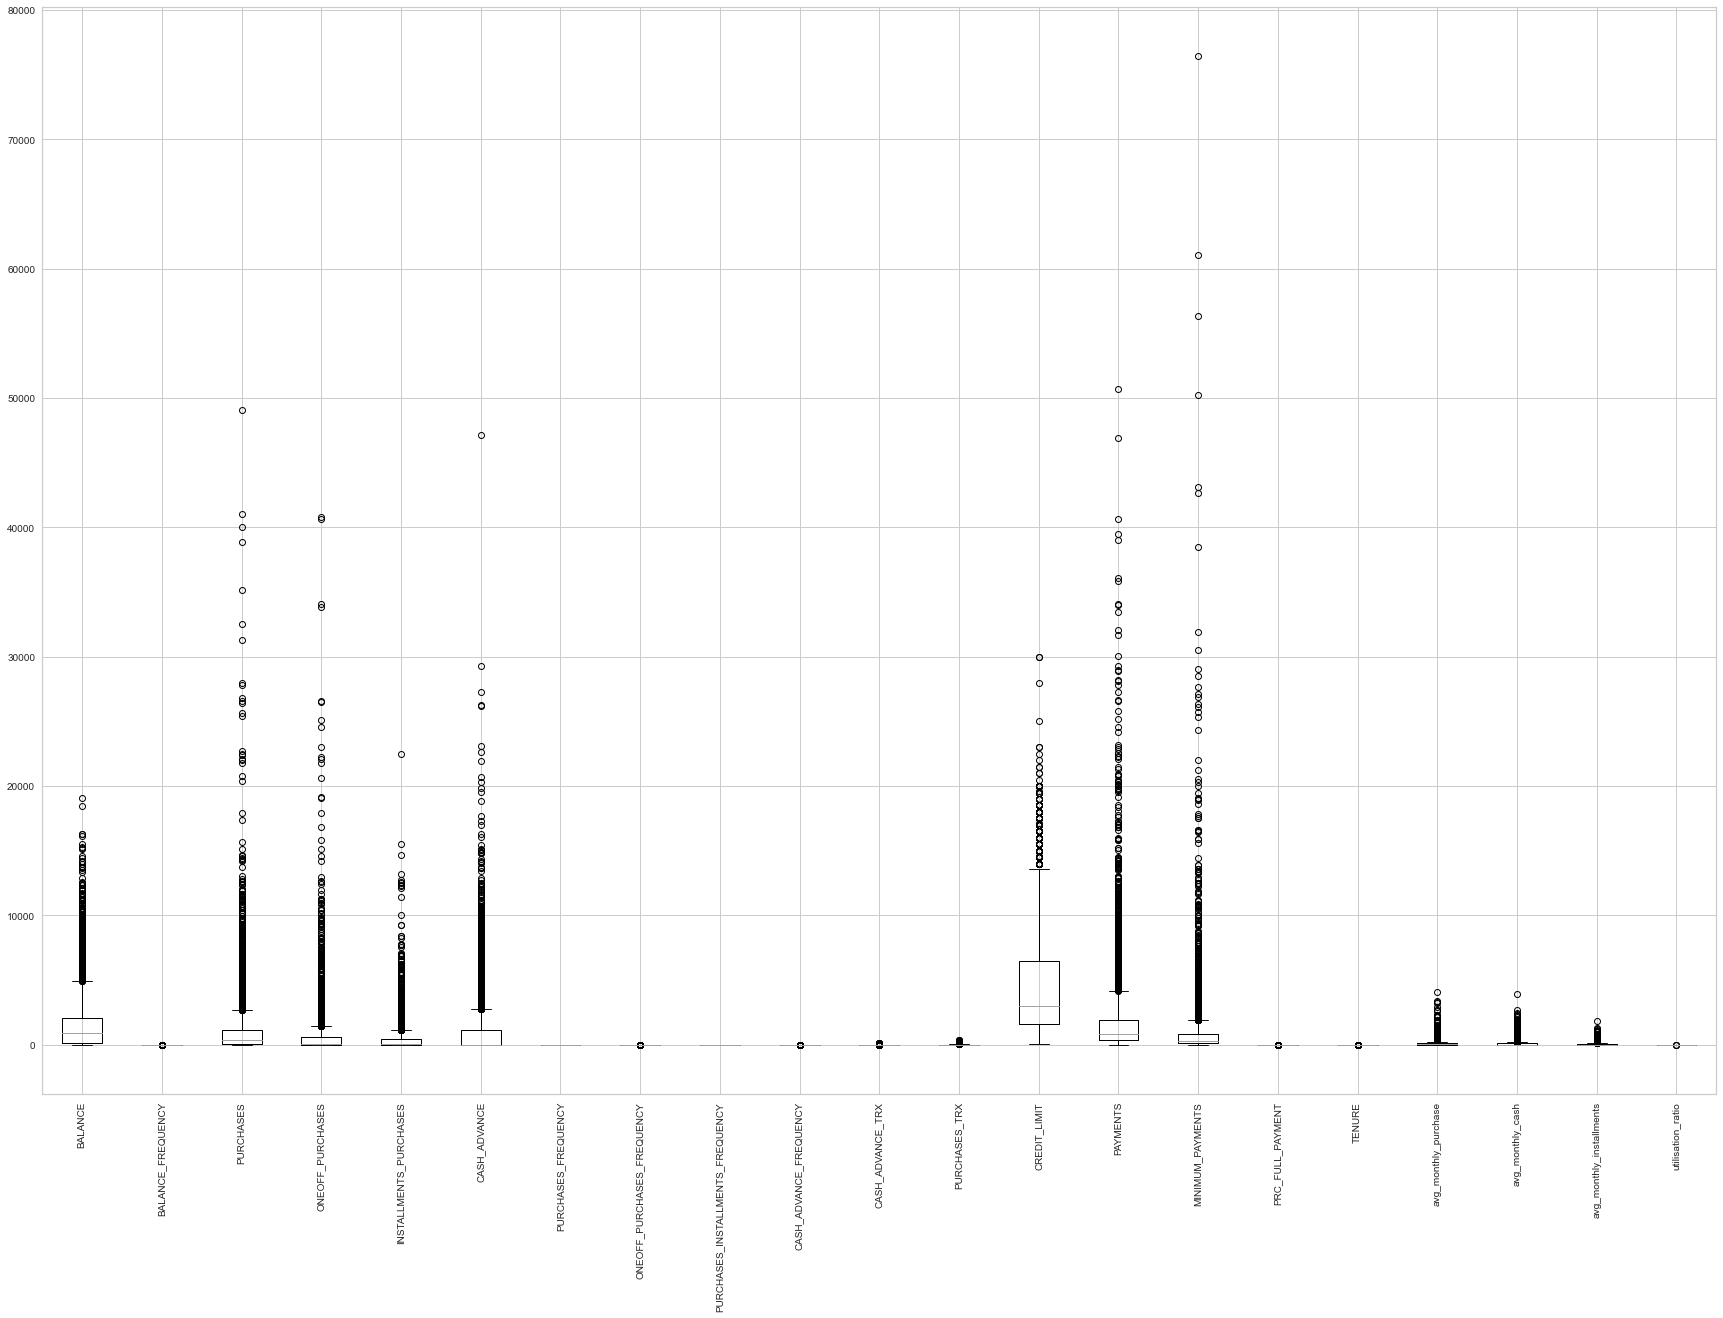

In [627]:
df.boxplot(rot=90 , figsize=(30,20))
plt.show()

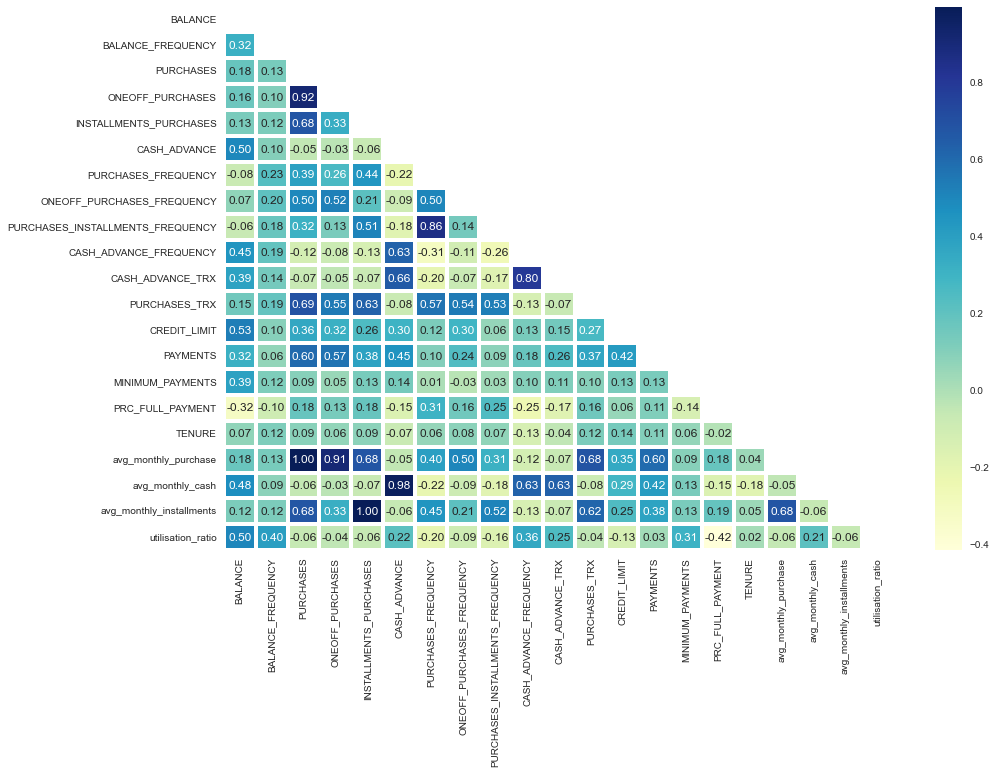

In [628]:
corr = df.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr, annot = True, cmap='YlGnBu', linewidths=3, fmt=".2f", mask = np.triu(corr))
plt.show()

Balance has a higher level of correlation with Cash Advance, Cash Advance Frequency and Credit Limit. Payments variable has a high correletion with Purchases and one off Purchases.

Tenure has a negative correlation with Cash Advance and Cash Advance Frequency variables. 

"PURACHASES_INSTALLMENTS_FREQUENCY" has strong positive correlation with "PURCHASE FREQUENCY".

"BALANCE" has a strong negative correlation with "PRC_FULL_PAYMENT" while "TENURE" has nearly no correlation with any features. (No linear relationship)

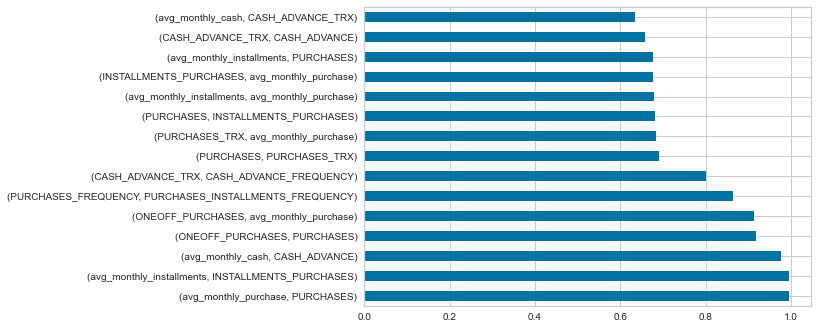

In [629]:
# Creating a bar plot showing the correlation of the numeric features
c = corr.abs()
corr_bar = c.unstack().sort_values(kind='quicksort')
corr_bar = corr_bar.loc[lambda x: x < 1]
corr_bar = corr_bar.drop_duplicates()
corr_bar = corr_bar.sort_values(ascending = False)

#top 15 correlated features.
corr_bar[:15].plot(kind = 'barh')
plt.show()

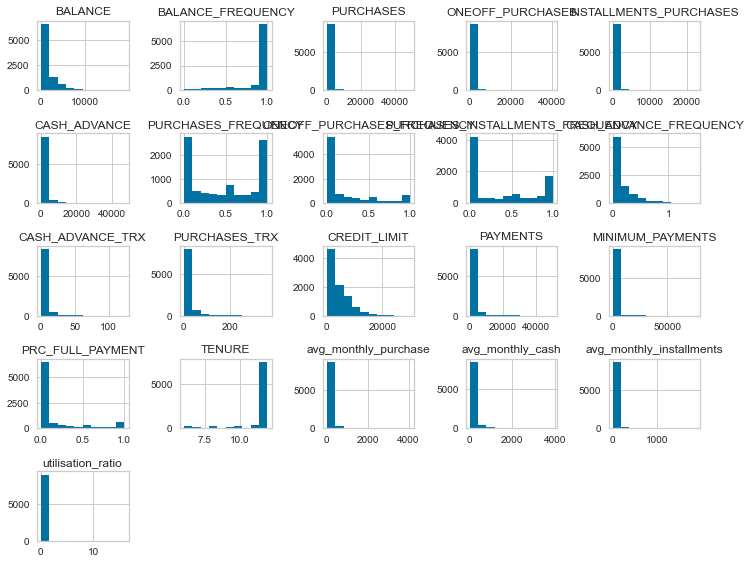

In [630]:
df.hist(figsize=(10,8))
plt.tight_layout()

 Observations

 - As the credit limit increase, the balance also increases and hence, a linear relationship
 - As the number of purchases increases, the number of "cash in advance" transactions decreases
 - As the credit balance is low, the purchases, oneoff_purchases and installments_purchases are also less. Thus validating our assumption from univariate analysis
 - Purchases, oneoff_purchases and installment_purchases are all somehow related linearly
 - As the credit balance is low, the "cash in advance" transactions are less

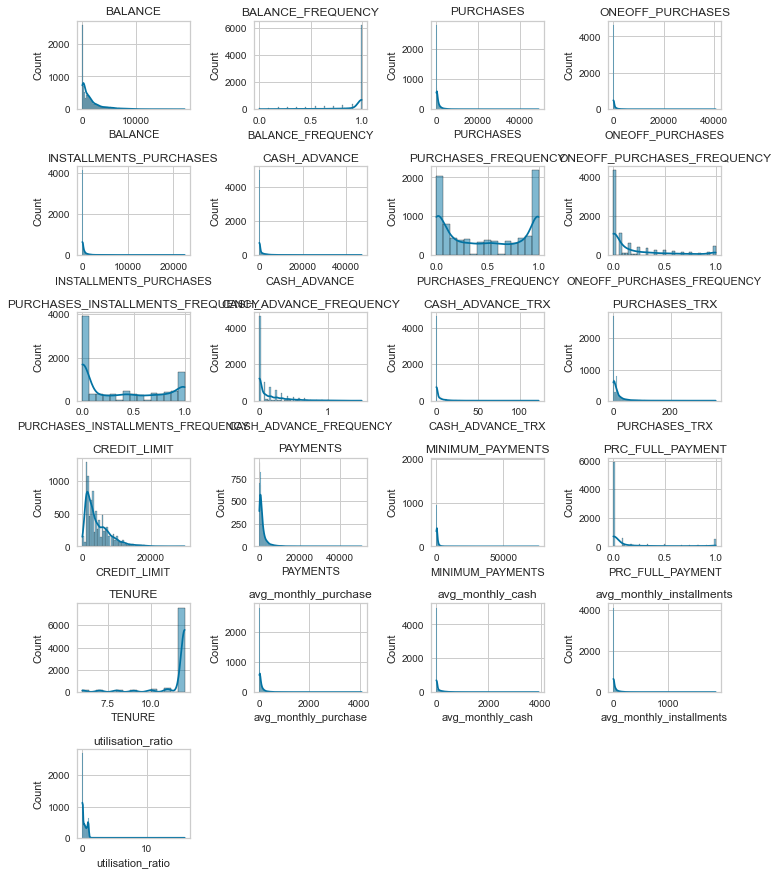

In [631]:
plt.figure(figsize = (10, 20))

for i in range(len(df.columns)):
    plt.subplot(10, 4, i+1)
    sns.histplot(df[df.columns[i]] ,kde = True)
    plt.title(df.columns[i])
    plt.tight_layout()

Observation:

 - Most credit card holders have low credit limit and maintained a rough credit balance below 7500.
 - Variables such as Purchases, OneOff_Purchases, installment_purchases and cash_advances also follow the same trend as credit balance. They could all be related. This can be interpreted where if the credit balance is low, the purchases are also low and so on.
 - Most people either don't purchase anything or they just purchase very frequently.
 - People who purchase in installments is more than people who purchase in one-go.
 - In the last 6 months, most people have made total payments below 10,000, with the minimum payments below 5000.
 - Finally, most of the credit card holders own a card for more than 12 months.

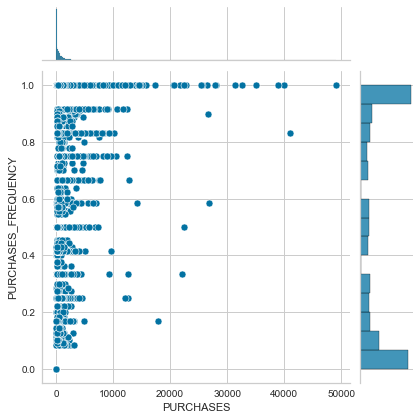

In [632]:
#People who regularly purchase stuff is seen to have cumulative purhcase amount as well.
sns.jointplot(x='PURCHASES', y='PURCHASES_FREQUENCY', data=df)
plt.show()

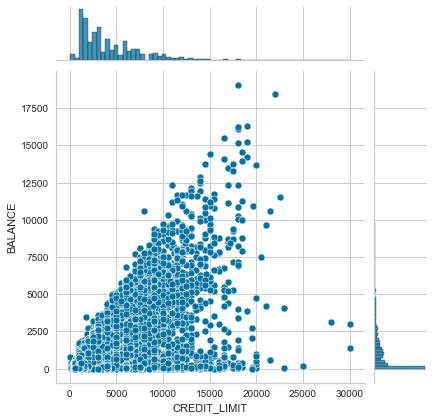

In [633]:
#if a customer's balance increases, their credit limit would also increase
# most customers are under the 15,000 credit limit boundary and $10,000 balance. Customers beyond that can be considered as premium customers.
sns.jointplot(x='CREDIT_LIMIT', y='BALANCE', data=df)
plt.show()

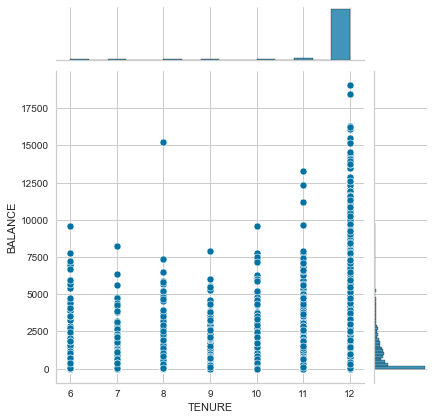

In [634]:
#People with the longest tenure (12) tend to have more balance in their accounts which could imply customer loyalty.
sns.jointplot(x='TENURE', y='BALANCE', data=df)
plt.show()

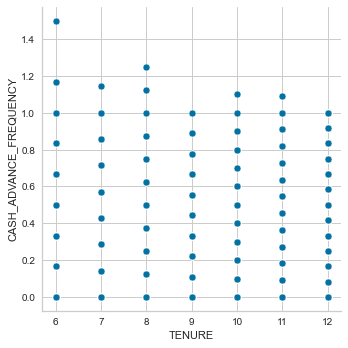

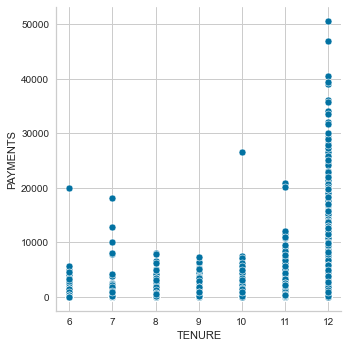

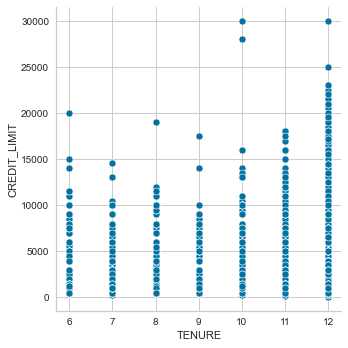

In [635]:
for i in ['CASH_ADVANCE_FREQUENCY', "PAYMENTS", "CREDIT_LIMIT"]:
    sns.relplot(x = 'TENURE', y = i, data = df)
    plt.show()

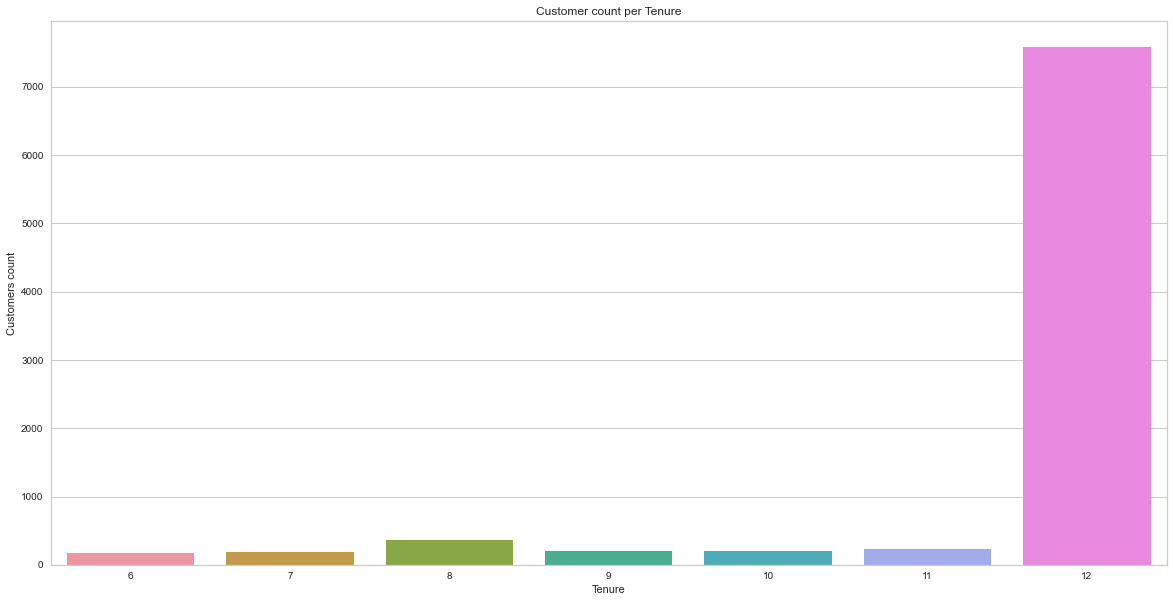

In [636]:
plt.figure(figsize = (20,10))
sns.barplot(data = df, x = df['TENURE'].unique(), y = df['TENURE'].value_counts(dropna = False))
plt.xlabel('Tenure')
plt.ylabel('Customers count')
plt.title('Customer count per Tenure')
plt.show()

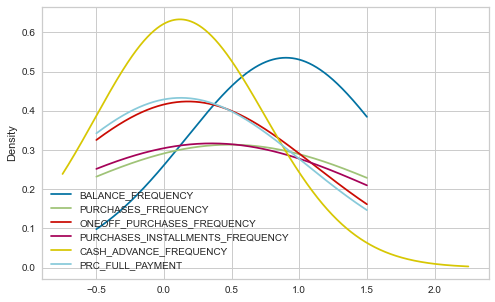

In [637]:
frequency_features = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
                      'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']

df[frequency_features].plot.kde(figsize=(8,5), bw_method=3) #,ind=[0, 2, 3,4]
plt.show()

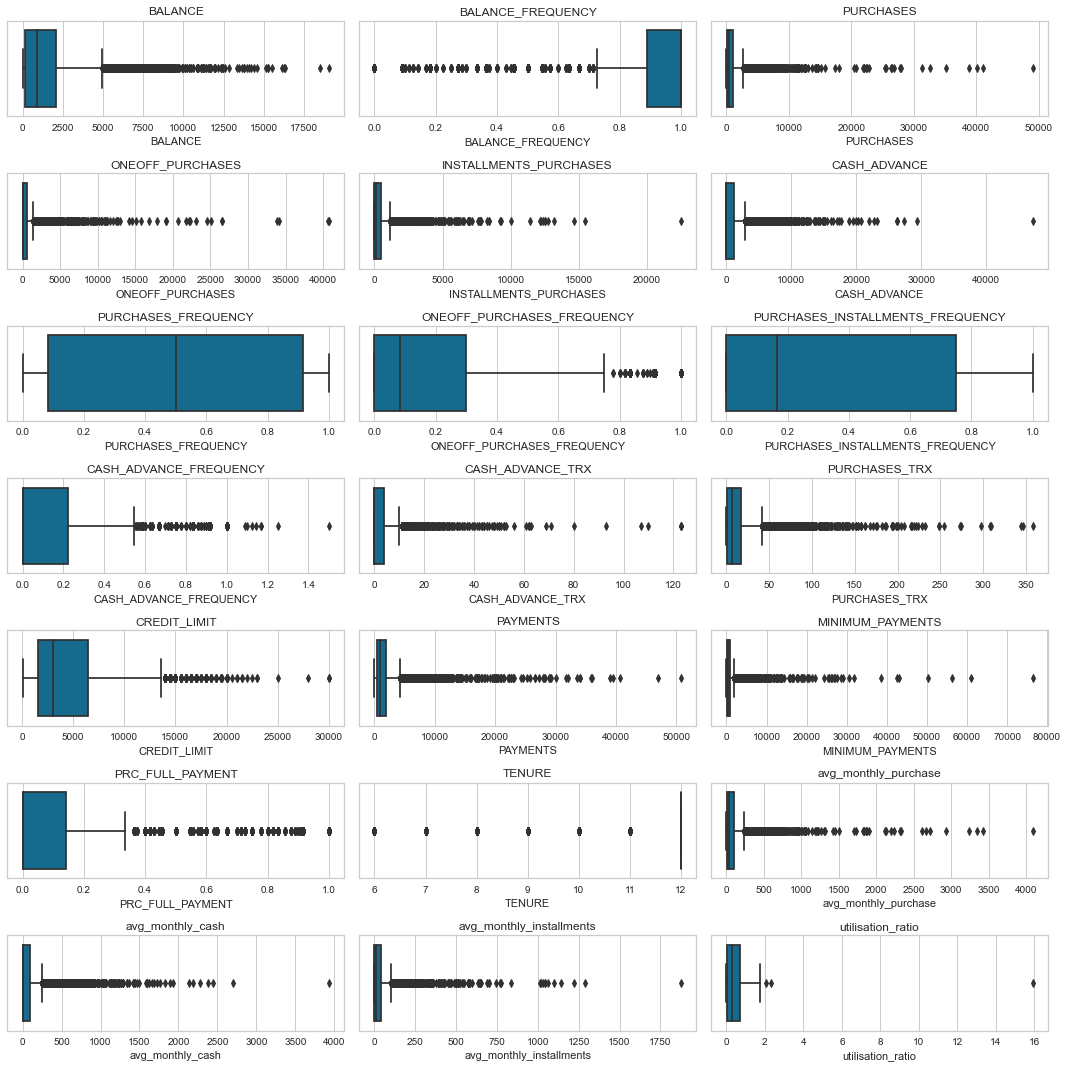

In [638]:
#As observed there is large amount of outliers and distribution isnt normal since they are highly skewed to either sides.
fig= plt.subplots(nrows = 7 , ncols = 3, figsize=(15,15))
for i in range(len(df.columns)):
    plt.subplot(7, 3, i+1)
    ax=  sns.boxplot(x = df[df.columns[i]])
    plt.title(df.columns[i])
    plt.tight_layout()

In [639]:
clean_df = df.copy()
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1), max_features=1.0)
model.fit(clean_df)

IsolationForest(contamination=0.1, n_estimators=150)

In [640]:
# Adding 'scores' and 'anomaly' colums to df
scores=model.decision_function(clean_df)
anomaly=model.predict(clean_df)

clean_df['scores']=scores
clean_df['anomaly']=anomaly

anomaly = clean_df.loc[clean_df['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Num of Outliers:', len(anomaly))

Num of Outliers: 895


In [641]:
# dropping outliers
clean_df = clean_df.drop(anomaly_index, axis = 0).reset_index(drop=True)

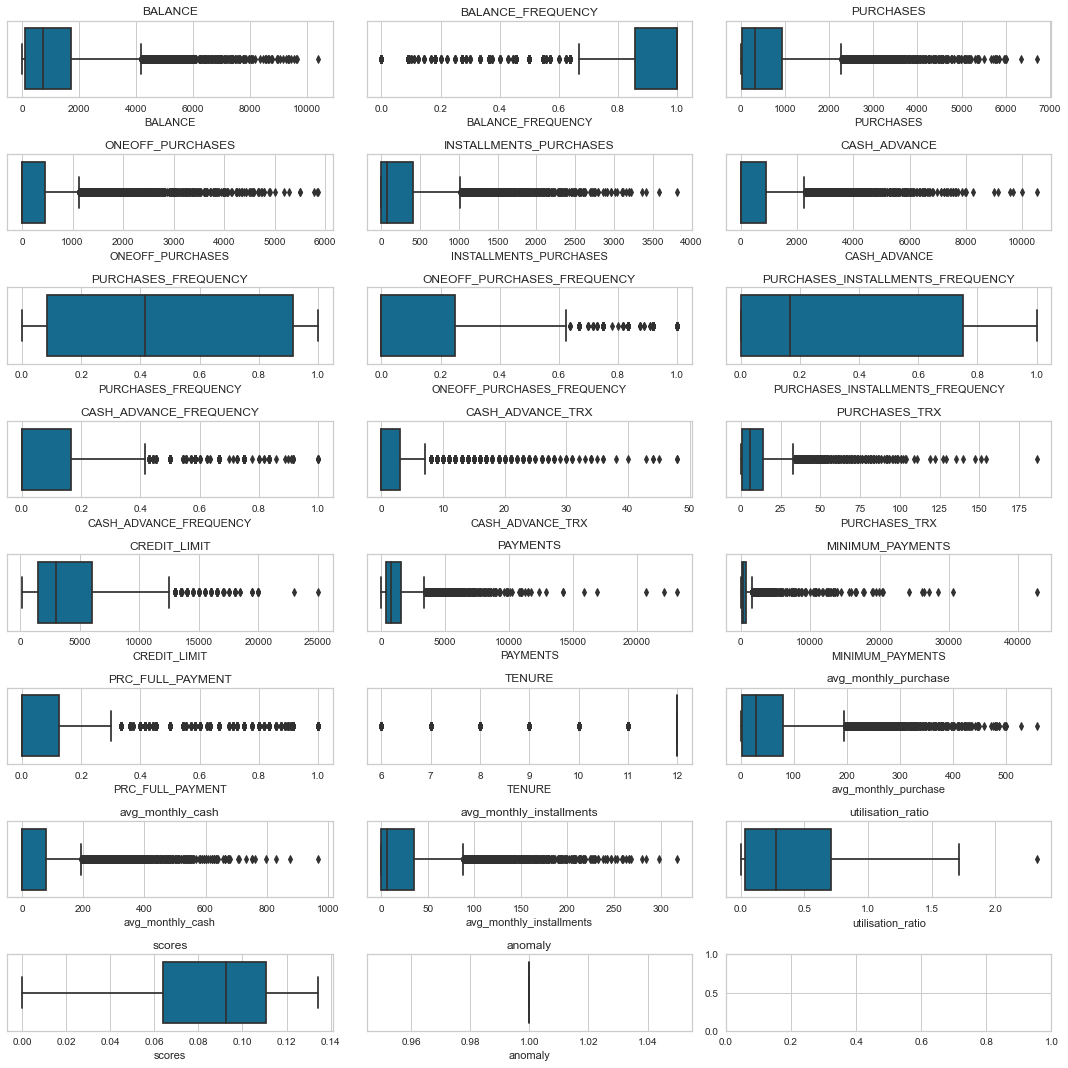

In [642]:
fig= plt.subplots(nrows = 8, ncols = 3, figsize=(15, 15))
for i in range (len(clean_df.columns)):
    plt.subplot(8, 3, i+1)
    ax =  sns.boxplot(x = clean_df[clean_df.columns[i]])
    plt.title(clean_df.columns[i])
    plt.tight_layout()

In [643]:
clean_df.drop(columns='scores' , axis=1 , inplace=True)
clean_df.drop(columns='anomaly' , axis=1 , inplace=True)

In [644]:
scaler= StandardScaler()
scaled_features=scaler.fit_transform(clean_df)
scaled_df=pd.DataFrame(scaler.fit_transform(clean_df), columns = clean_df.columns)
scaled_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,avg_monthly_purchase,avg_monthly_cash,avg_monthly_installments,utilisation_ratio
0,-0.778010,-0.210152,-0.620997,-0.526872,-0.416756,-0.542234,-0.759479,-0.640551,-0.671733,-0.670182,...,-0.601266,-0.960940,-0.697911,-0.349922,-0.516640,0.349906,-0.632950,-0.539543,-0.427623,-0.939712
1,1.249437,0.161922,-0.723055,-0.526872,-0.615877,4.641320,-1.178919,-0.640551,-0.885130,0.794288,...,-0.730778,0.962145,1.946759,0.252277,0.260654,0.349906,-0.733580,4.275182,-0.623563,0.232749
2,0.795848,0.533996,0.104070,0.542134,-0.615877,-0.542234,1.337715,2.959386,-0.885130,-0.670182,...,0.046296,1.122402,-0.413011,-0.035034,-0.516640,0.349906,0.081979,-0.539543,-0.623563,-0.118512
3,0.264562,-0.954300,0.880552,1.545687,-0.615877,-0.376671,-0.969200,-0.340557,-0.885130,-0.182027,...,-0.666022,1.122402,-0.834714,0.117977,-0.516640,0.349906,0.847603,-0.385761,-0.623563,-0.429400
4,-0.279856,0.533996,-0.705938,-0.504750,-0.615877,-0.542234,-0.969200,-0.340557,-0.885130,-0.670182,...,-0.666022,-0.896837,-0.374866,-0.281957,-0.516640,0.349906,-0.716703,-0.539543,-0.623563,0.862986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8049,-0.680105,-0.148142,0.360348,0.873357,-0.615877,-0.542234,-0.340042,0.559427,-0.885130,-0.670182,...,-0.601266,0.000603,-0.834714,-0.408425,-0.516640,-4.378519,1.402926,-0.539543,-0.623563,-0.918626
8050,-0.785967,0.533996,-0.411619,-0.526872,-0.008246,-0.542234,1.337715,-0.640551,1.248852,-0.670182,...,-0.342241,-0.960940,-0.613991,-0.408425,1.232274,-4.378519,-0.119419,-0.539543,0.572290,-0.974631
8051,-0.791937,0.533996,-0.402119,-0.526872,0.010288,-0.542234,1.337715,-0.640551,1.248852,-0.670182,...,-0.342241,-0.960940,-0.647705,-0.386778,-0.516640,-4.378519,-0.100685,-0.539543,0.608767,-1.000833
8052,-0.789234,-0.148142,-0.568578,-0.526872,-0.314482,-0.542234,0.918275,-0.640551,0.822057,-0.670182,...,-0.406997,-0.960940,-0.779620,-0.386778,0.357817,-4.378519,-0.428946,-0.539543,-0.030402,-0.988970


## 3. K-means

### Elbow

In [645]:
params = {"init":"random","n_init":10,"max_iter":300,"random_state":0}
cluster_range = range( 1, 21 )
cluster_errors=[]
for k in cluster_range:
    kmeans= KMeans(n_clusters=k, **params) #** open dictionry
    kmeans.fit(scaled_features)
    cluster_errors.append(kmeans.inertia_) 

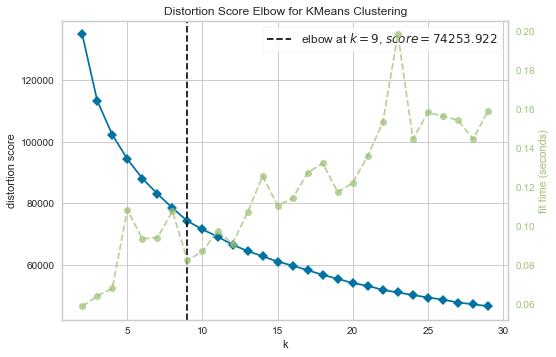

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [646]:
model = KMeans(n_clusters=k, **params)

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(scaled_features)        
visualizer.show()        

In [647]:
k1 = KneeLocator(range(1,21), cluster_errors , curve='convex', direction= 'decreasing')
k1.elbow

6

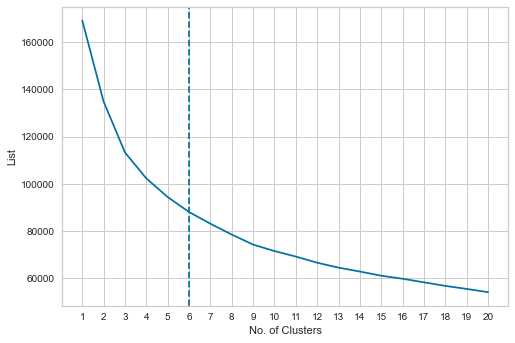

In [648]:
plt.plot(range(1, 21), cluster_errors)
plt.xticks(range(1, 21))
plt.xlabel('No. of Clusters')
plt.ylabel('List')
plt.axvline(x = k1.elbow, color='b', ls= '--')
plt.show()

### Silhouette Coefficient

In [649]:
silhouette_coefficients =[]
#min of clusters is 2
for k in range(2, 21):
    kmeans = KMeans(n_clusters = k, **params)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

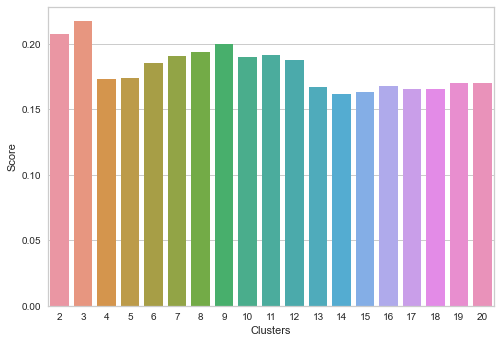

In [650]:
k = [i for i in range(2,21)]
ax = sns.barplot(x = k, y = silhouette_coefficients) # k = 3 seems to have the highest score
ax.set(xlabel = 'Clusters', ylabel = 'Score')
plt.show()

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=3, n_init=10,
                                      random_state=0))

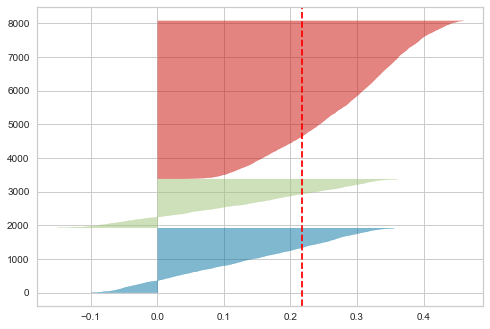

In [651]:
km = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10, max_iter = 100, random_state = 0)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(scaled_features)

### Dendograms

In [652]:
distance = linkage(scaled_features, 'ward')

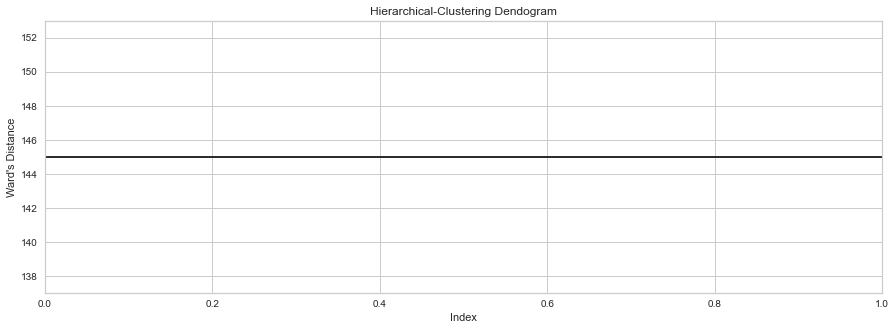

In [653]:
plt.figure(figsize=(15,5))
plt.title("Hierarchical-Clustering Dendogram")
plt.xlabel("Index")
plt.ylabel("Ward's Distance")
#dendrogram(distance, leaf_rotation=90, leaf_font_size=9); #Takes awhile to run!
plt.axhline(145, c='k')
plt.show()
#Based on the dendogram, to cut off the longest line the graph, we chose a line within 130 to 150. Hence, this gives us 3 main clusters.

In [654]:
km_model = KMeans(n_clusters = 3)
y_pred_km = km_model.fit_predict(scaled_features)

In [655]:
centroids = pd.DataFrame(data = kmeans.cluster_centers_, columns = [clean_df.columns])
centroids

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,avg_monthly_purchase,avg_monthly_cash,avg_monthly_installments,utilisation_ratio
0,-0.760434,-2.332483,-0.473162,-0.307778,-0.458923,-0.366038,-0.658736,-0.421223,-0.522466,-0.494301,...,-0.531465,-0.241970,-0.413245,-0.265711,-0.321443,0.116610,-0.480353,-0.370953,-0.466627,-0.956175
1,0.280212,0.507095,0.015207,-0.315937,0.507798,-0.160993,0.975927,-0.309853,1.172657,-0.062003,...,0.432591,-0.571264,-0.083822,0.360793,-0.481849,0.266444,0.001138,-0.178008,0.492014,1.271574
2,-0.701376,0.285458,0.842917,1.149913,-0.091842,-0.523266,1.034086,2.328971,-0.124065,-0.624705,...,0.694441,1.076097,0.222892,-0.331154,2.098616,0.268259,0.830880,-0.521632,-0.104718,-0.957219
3,-0.657015,-0.393271,-0.327696,-0.281651,-0.212266,-0.463343,0.446001,-0.256505,0.347542,-0.426013,...,-0.333205,-0.732604,-0.626863,-0.303365,0.339321,-3.550739,-0.059630,-0.412962,0.068548,-0.592764
4,0.465162,-0.607940,-0.377978,-0.221294,-0.403911,1.169145,-0.761417,-0.423814,-0.607539,0.306853,...,-0.541248,0.916598,4.404301,0.121574,0.043209,0.285835,-0.391131,1.063917,-0.414983,-0.230159
5,-0.354426,0.272416,-0.408236,-0.221365,-0.461907,-0.402728,-0.617215,-0.251154,-0.599631,-0.445398,...,-0.500998,0.264531,-0.315512,-0.229613,-0.386966,0.268345,-0.419865,-0.408912,-0.471082,-0.595422
6,-0.633553,0.090790,-0.166626,-0.402927,0.284447,-0.502333,0.975230,-0.420283,1.194682,-0.592201,...,0.246072,-0.250626,-0.405703,-0.303231,-0.120677,0.264504,-0.179179,-0.501997,0.272043,-0.780399
7,0.243460,0.423577,3.535868,4.015401,0.836971,-0.464034,1.046658,2.054710,0.597144,-0.526497,...,2.078750,0.856086,1.544825,-0.087094,0.422930,0.285642,3.498909,-0.466236,0.808500,-0.292409
8,-0.781102,-1.522807,-0.355055,-0.331955,-0.192134,-0.507925,-0.227213,-0.373350,-0.157948,-0.612788,...,-0.348854,-0.005996,-0.319546,-0.351881,2.240411,0.177862,-0.361712,-0.505888,-0.202313,-1.015522
9,0.159315,0.324785,-0.609990,-0.412013,-0.568672,0.710952,-0.963717,-0.465362,-0.789869,1.140628,...,-0.626813,-0.327855,-0.037800,-0.079900,-0.415068,0.253105,-0.620696,0.637990,-0.576732,0.536778


In [656]:
clean_df['labels'] = km_model.labels_

In [657]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'avg_monthly_purchase', 'avg_monthly_cash',
       'avg_monthly_installments', 'utilisation_ratio'],
      dtype='object')

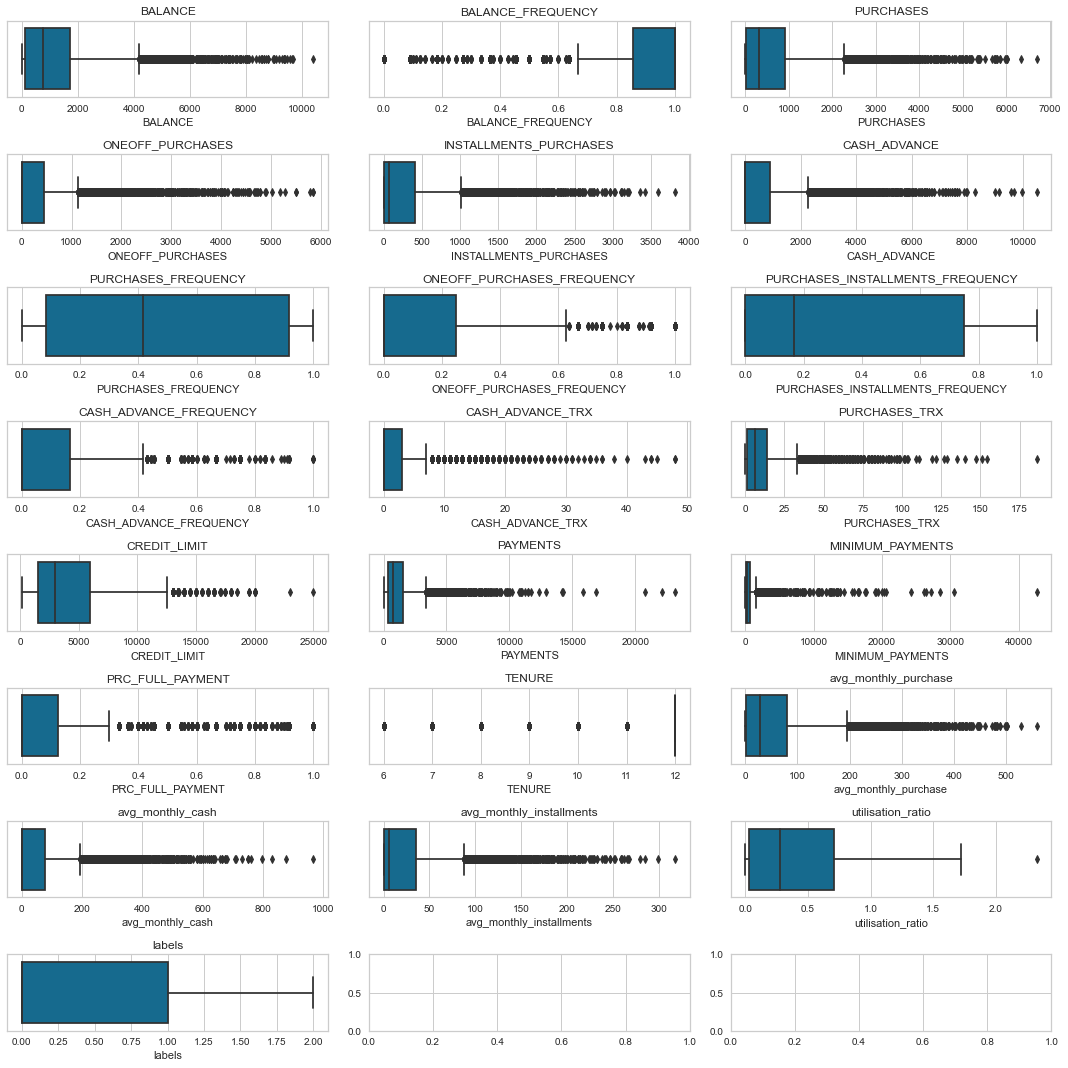

In [658]:
fig= plt.subplots(nrows = 8, ncols = 3, figsize=(15, 15))
for i in range (len(clean_df.columns)):
    plt.subplot(8, 3, i+1)
    ax =  sns.boxplot(x = clean_df[clean_df.columns[i]])
    plt.title(clean_df.columns[i])
    plt.tight_layout()

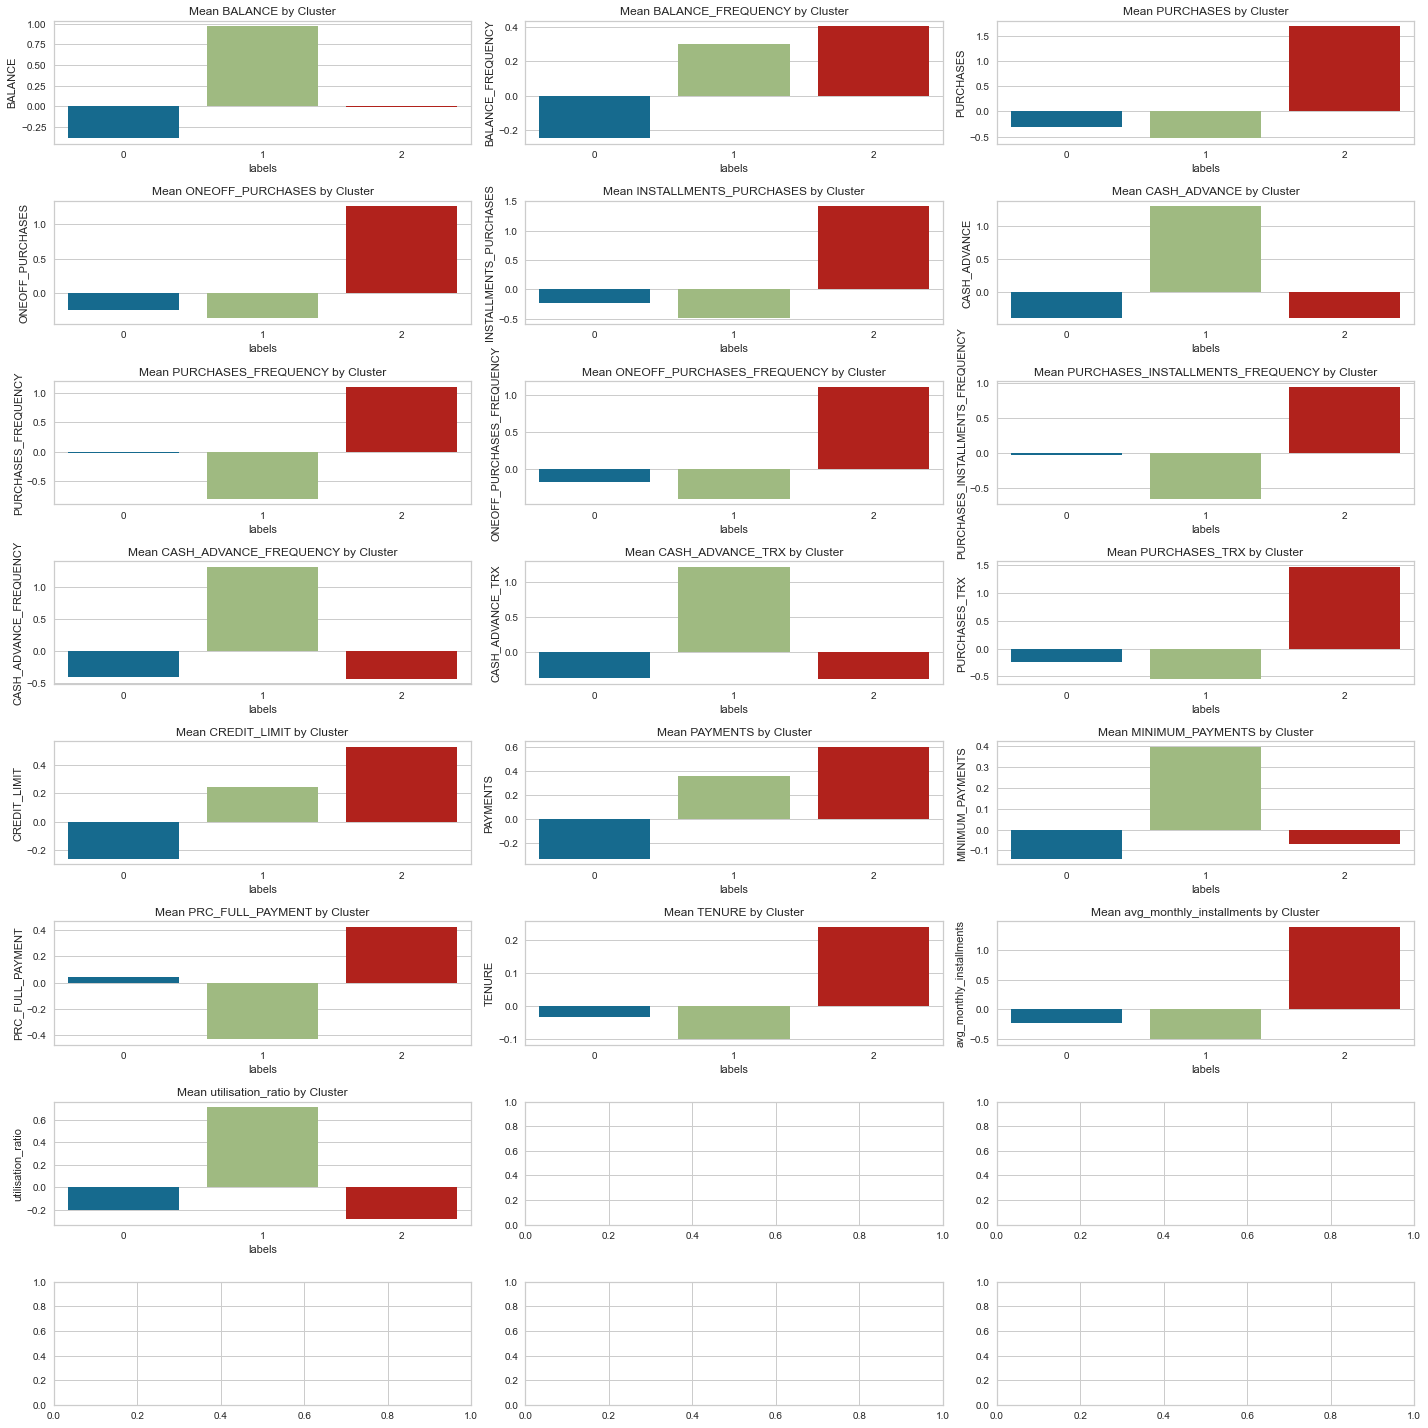

In [659]:
base_features = df.drop(columns = ['avg_monthly_purchase', 'avg_monthly_cash']).columns
fig = plt.subplots(nrows = 8, ncols = 3, figsize = (20,20))
counter = 0

for i in base_features:
    plt.subplot(8, 3, counter + 1)
    counter += 1
    ax = sns.barplot(x = scaled_df.groupby(clean_df['labels']).mean().index, 
                y = i, data = scaled_df.groupby(clean_df['labels']).mean())
    plt.title('Mean ' + str(i) + ' by Cluster')
    plt.tight_layout()

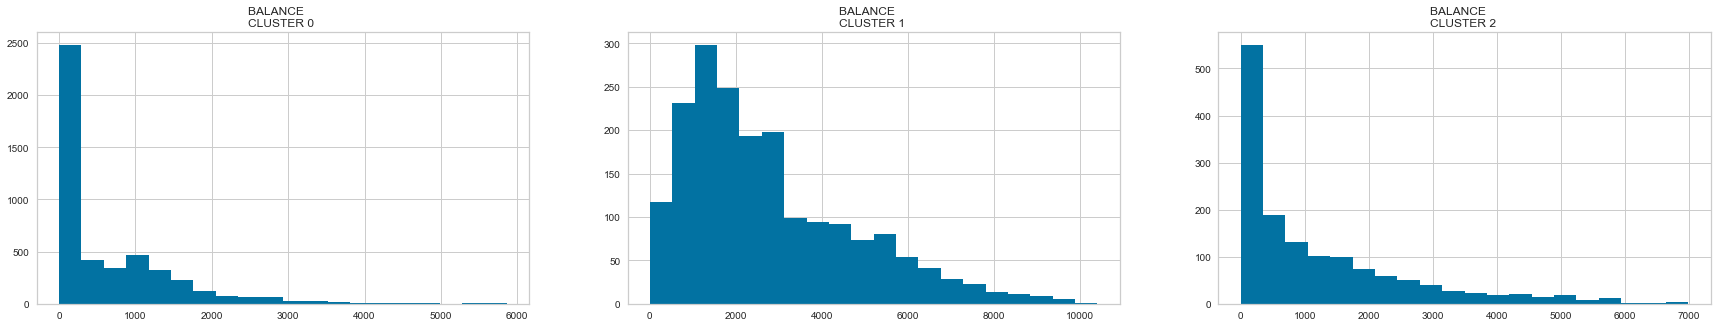

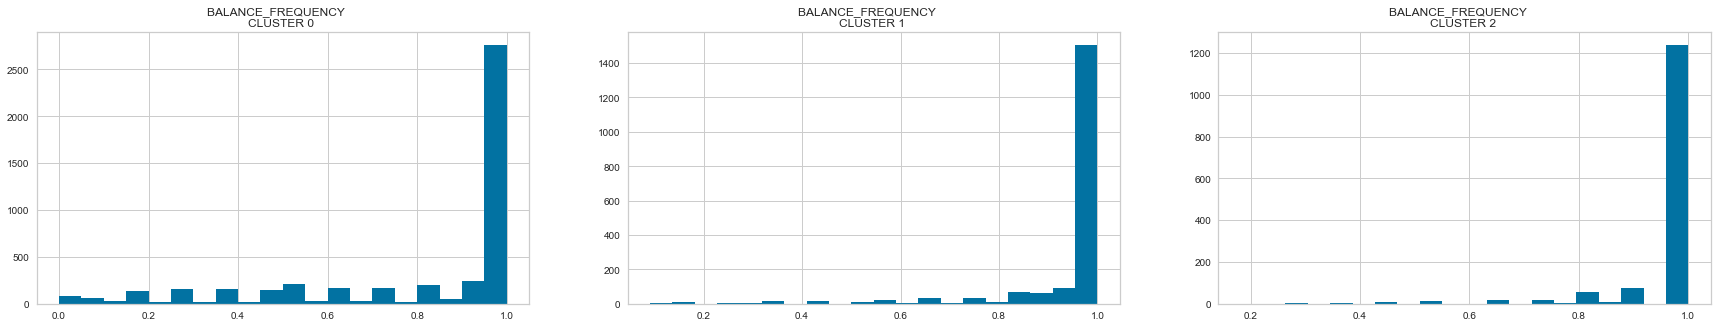

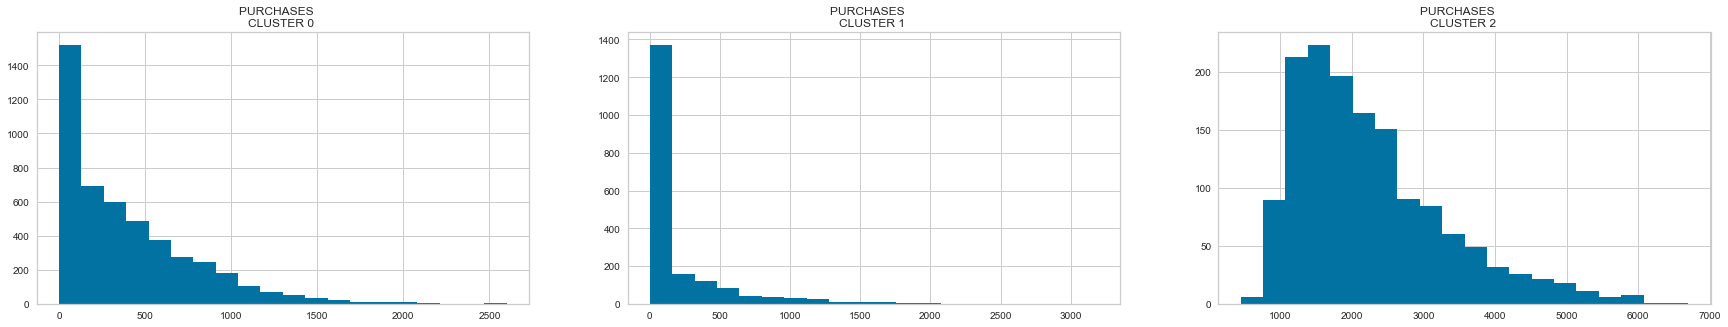

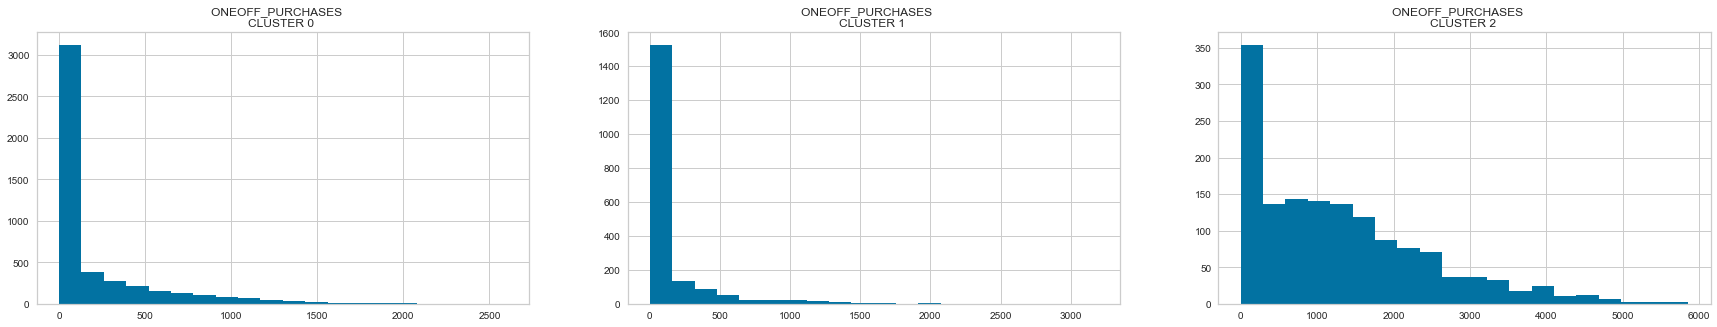

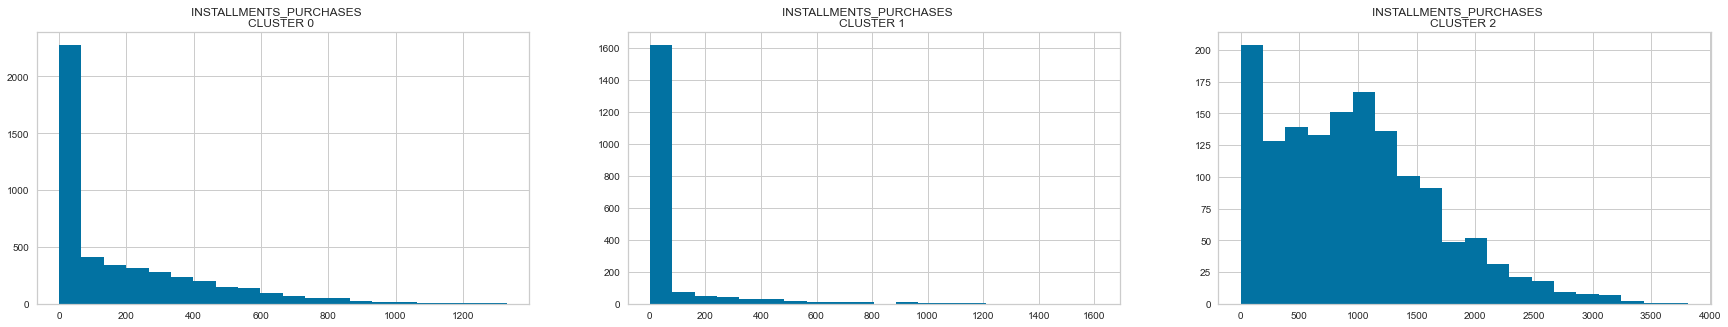

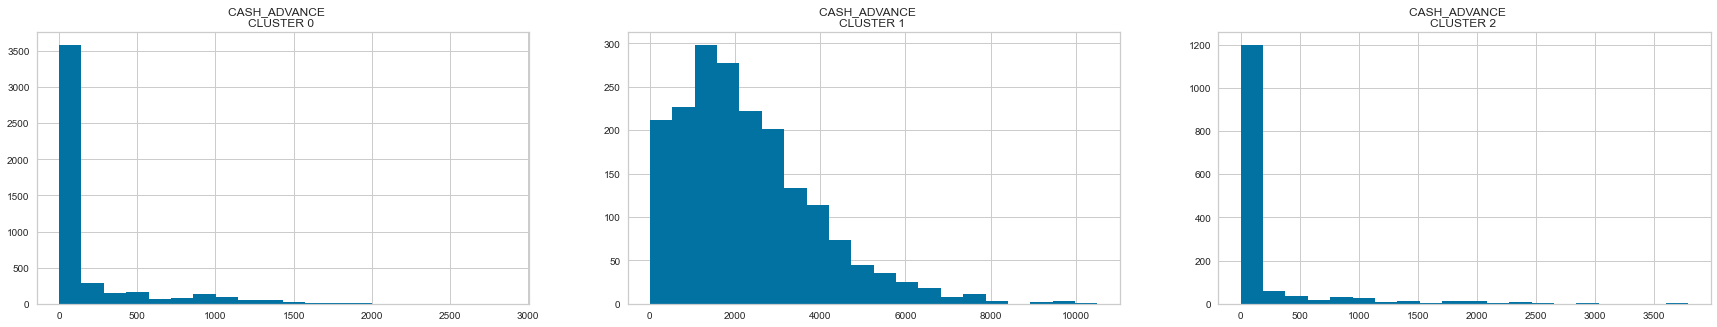

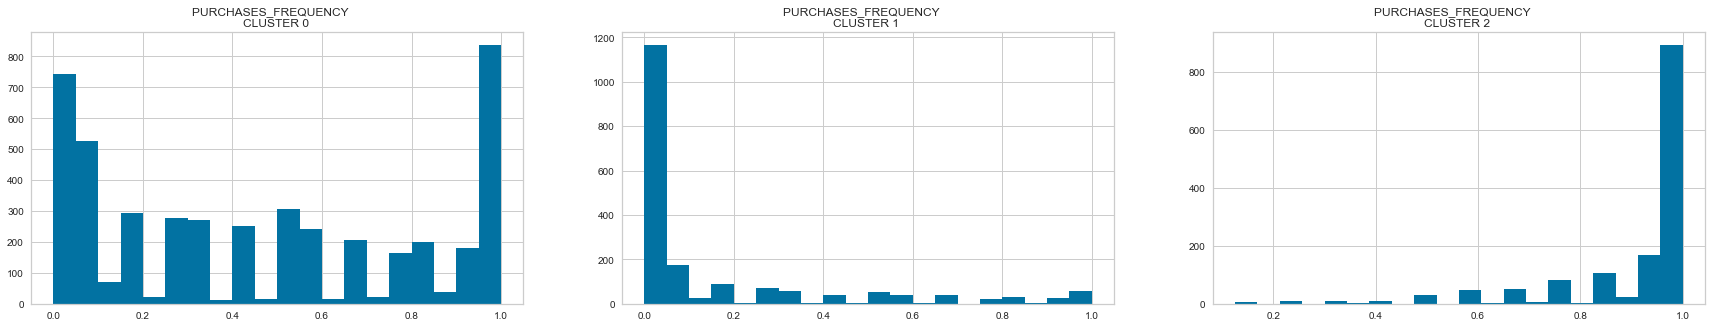

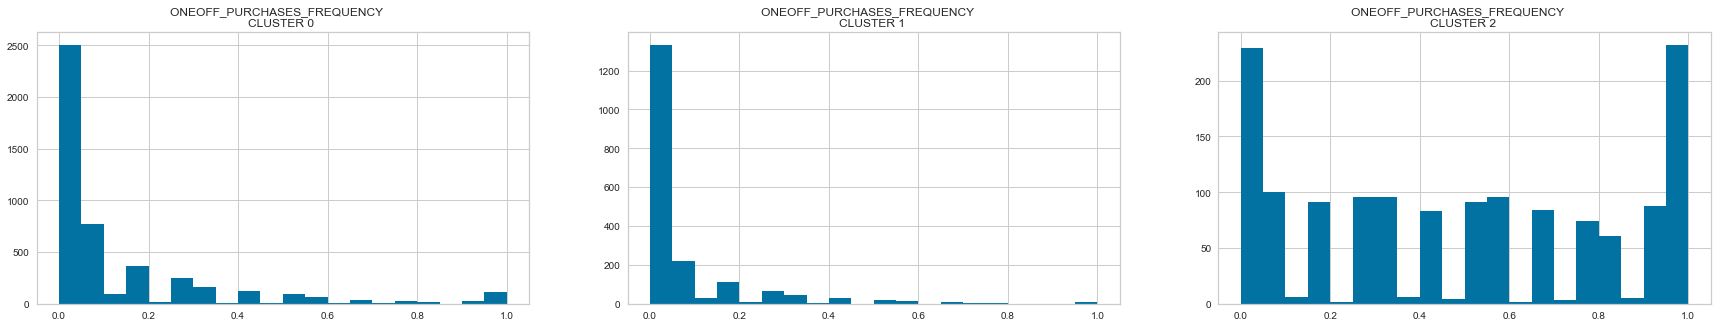

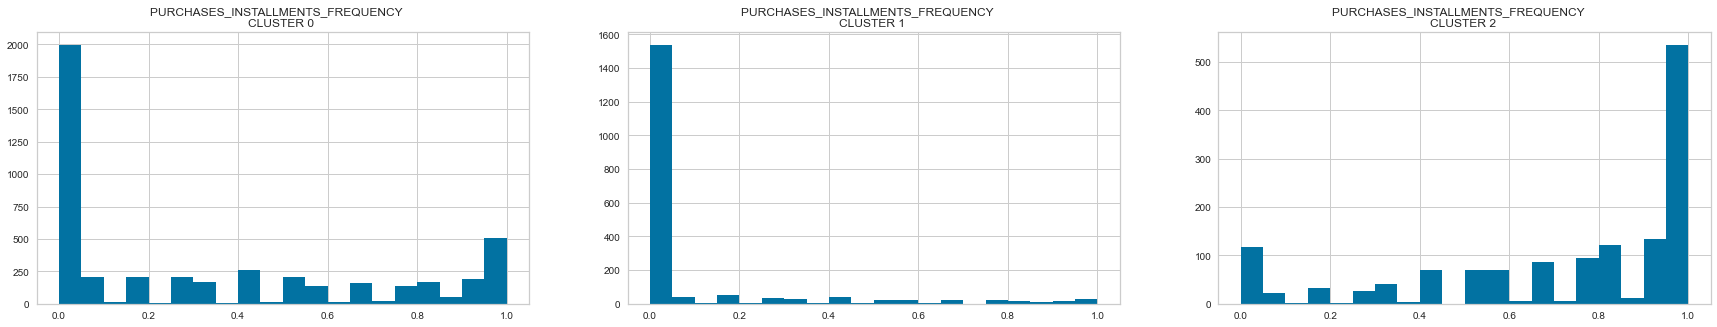

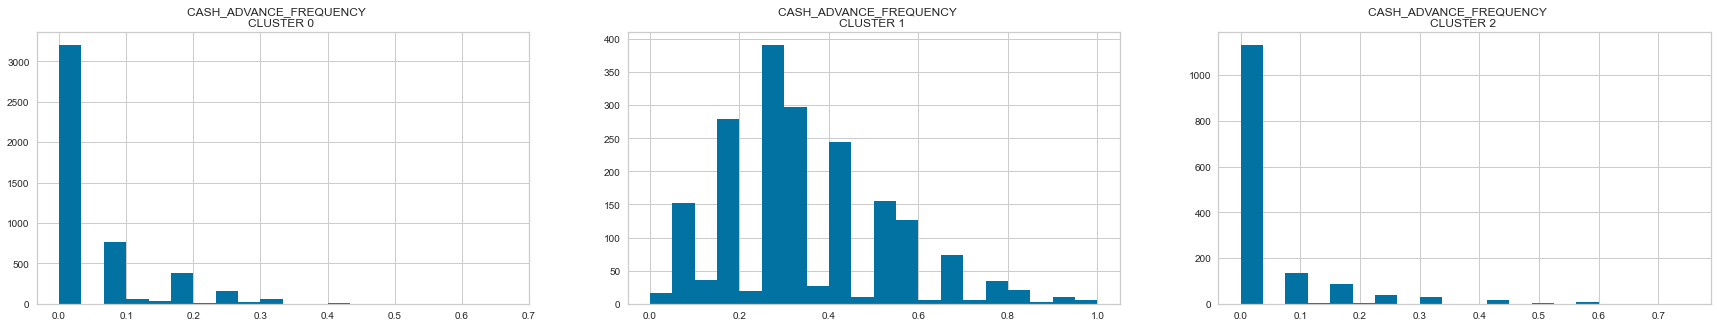

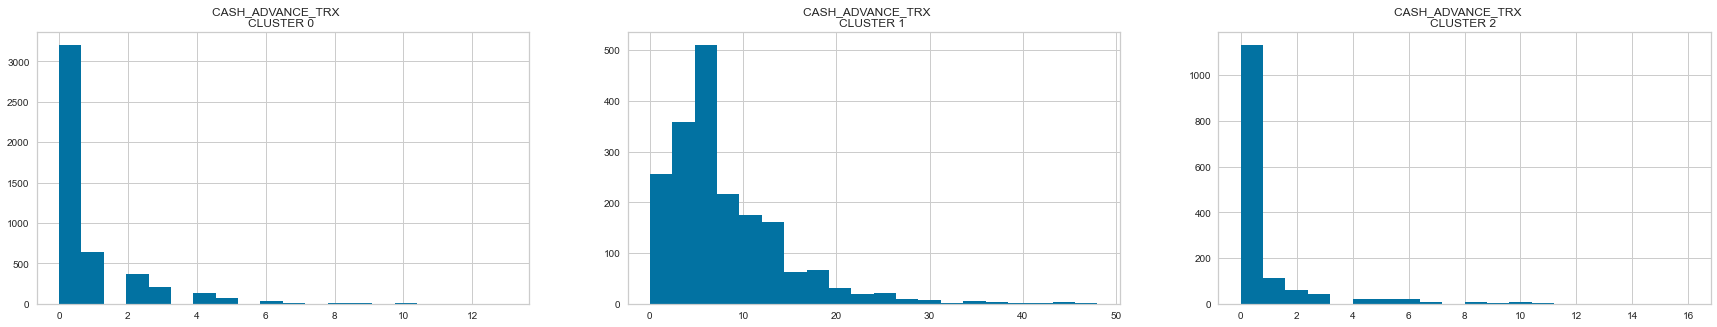

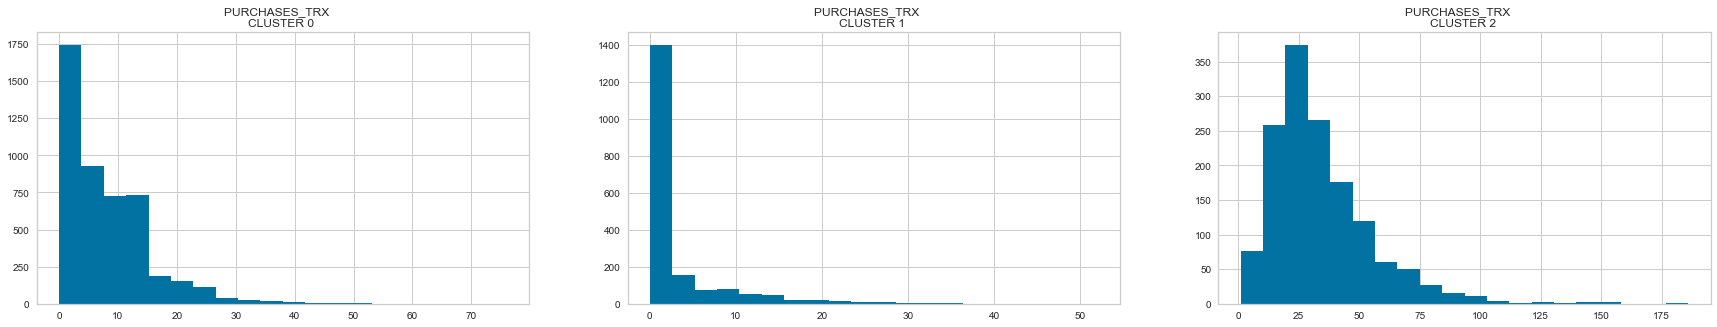

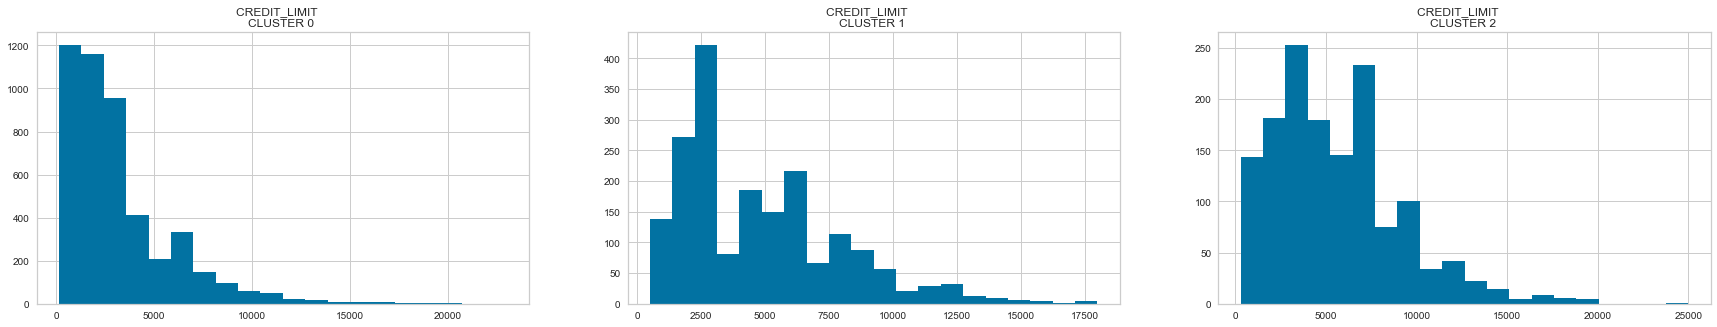

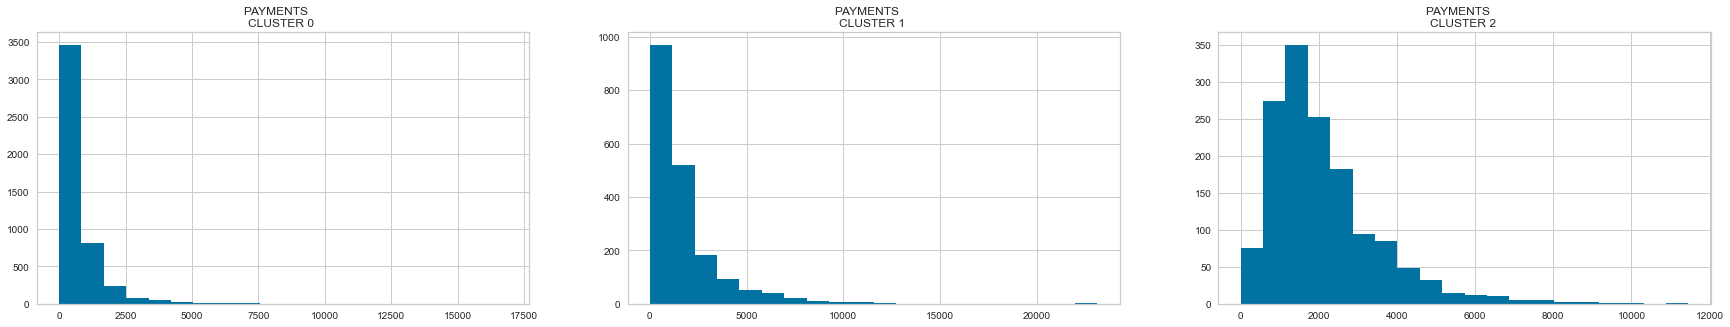

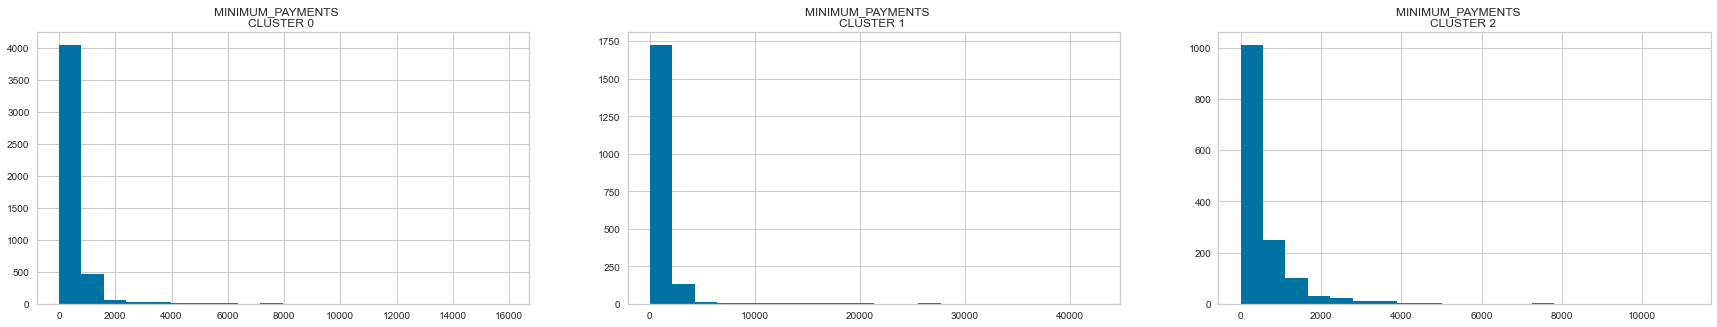

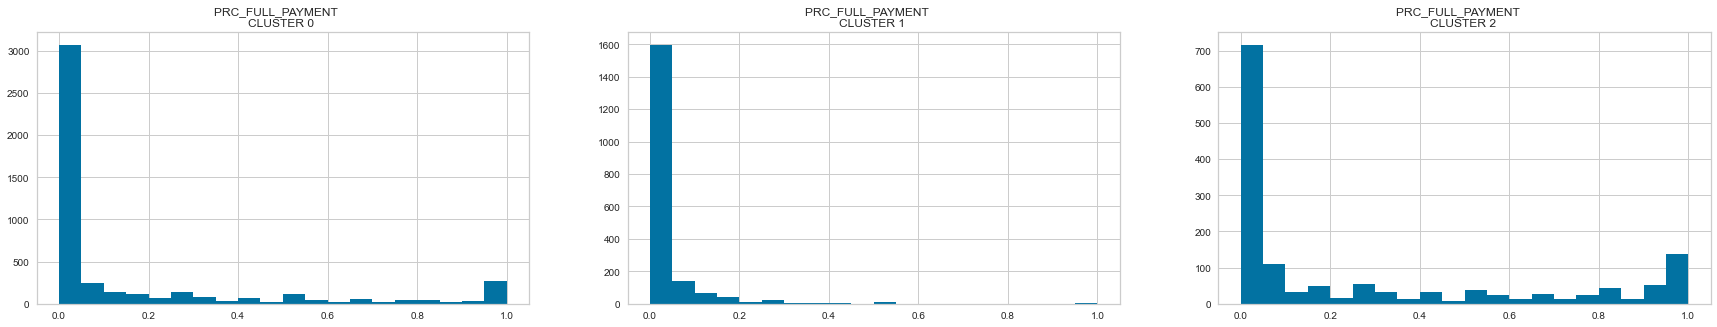

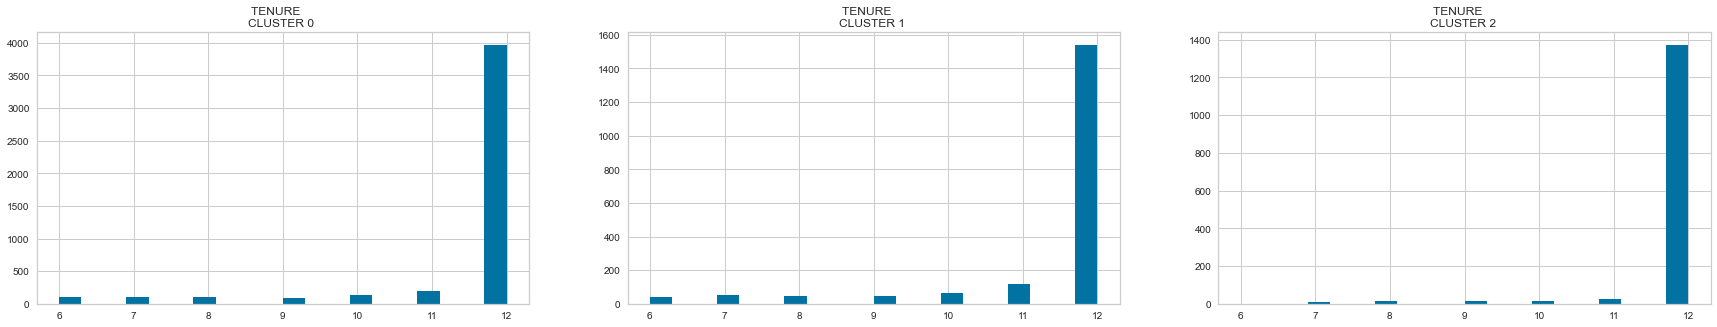

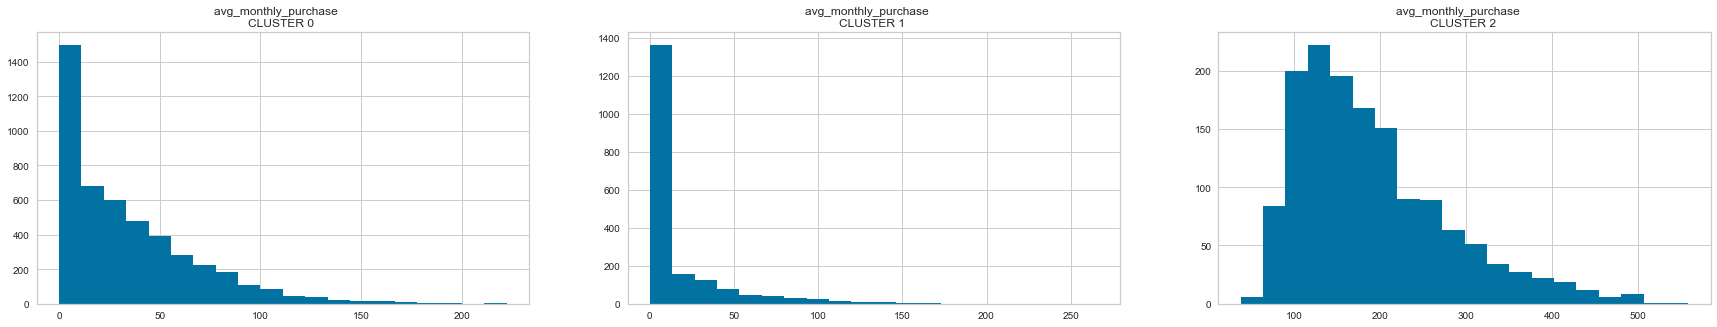

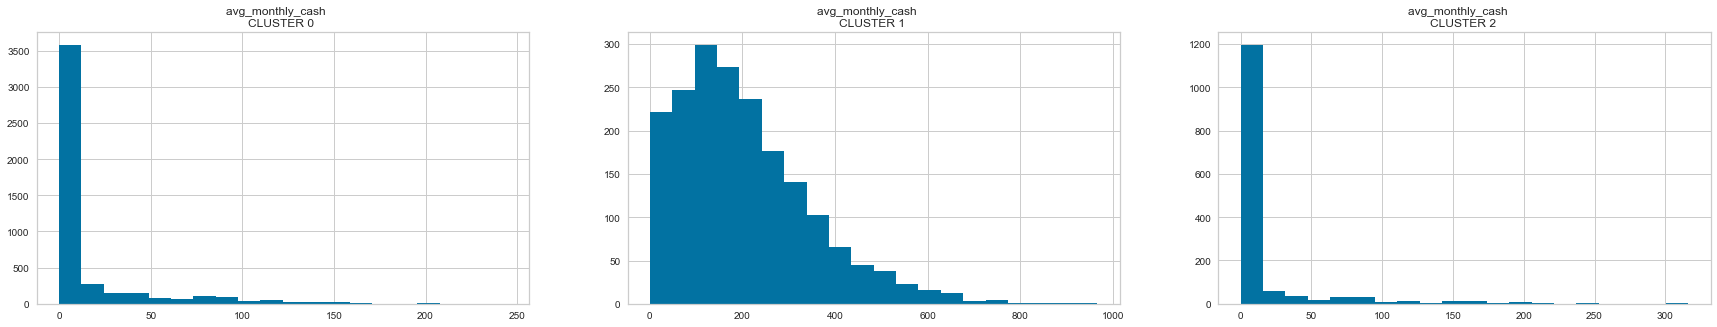

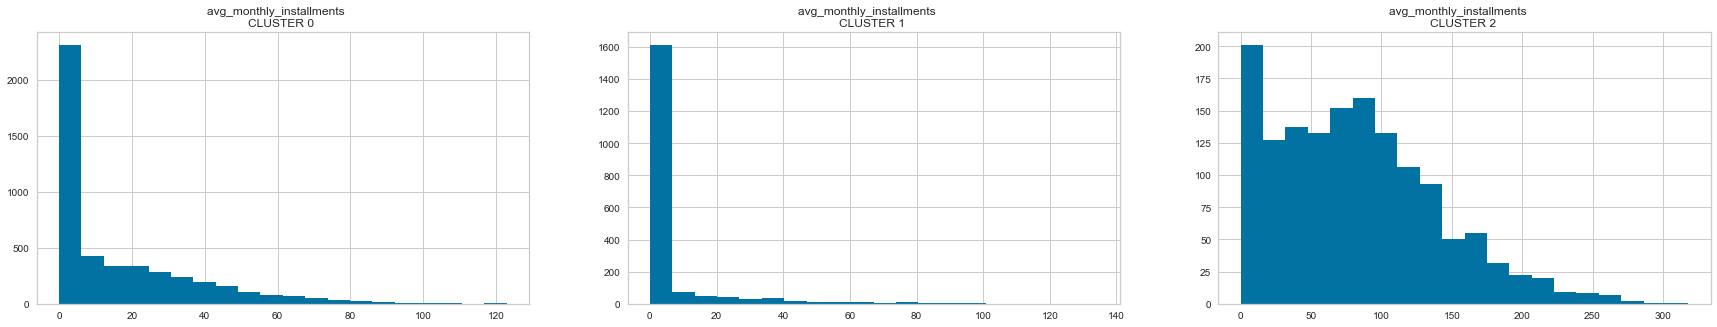

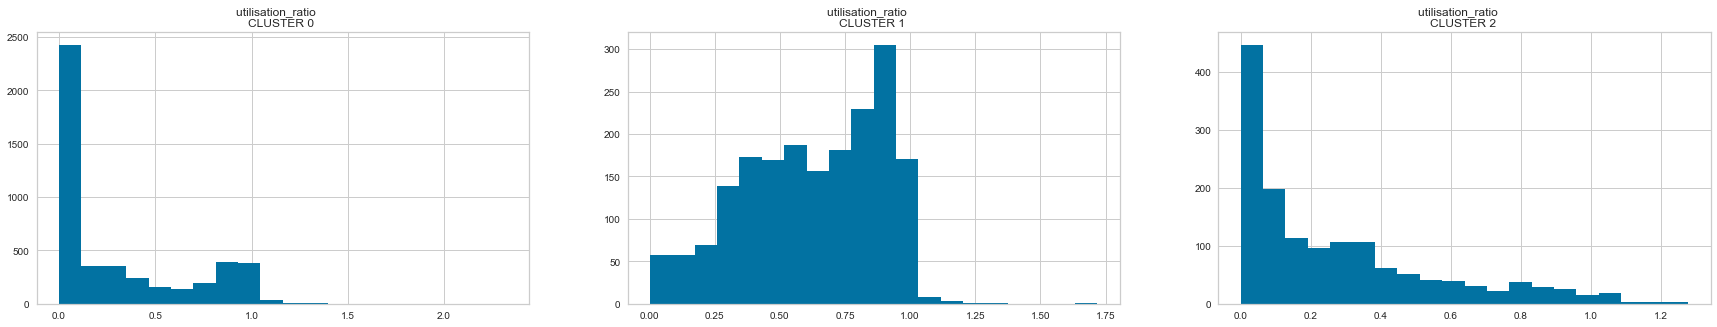

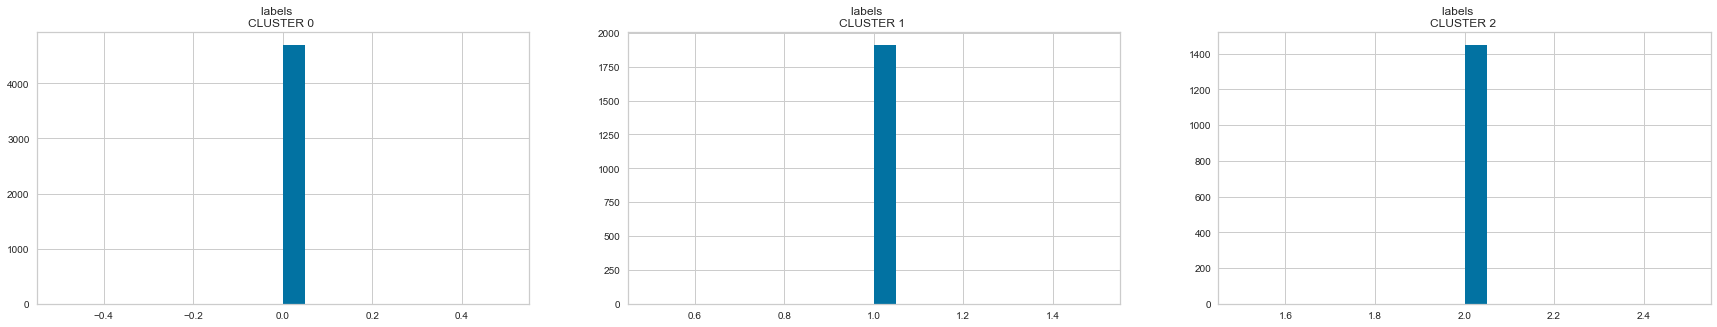

In [660]:
# Plot the histogram of various clusters
for i in clean_df.columns:
    plt.figure(figsize = (30, 5))
    for j in range(3):
        plt.subplot(1,3,j+1)
        ax = clean_df[clean_df['labels'] == j]
        ax[i].hist(bins=20)
        plt.title('{}    \nCLUSTER {} '.format(i,j))
plt.show()

In [661]:
#Lets visualise the clusters in 2D
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data = pca_components, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-0.941247,-2.295545
1,-4.028068,3.790458
2,1.074003,0.451749
3,-0.044838,-0.123686
4,-1.463084,-1.433750


In [662]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': km_model.labels_})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-0.941247,-2.295545,0
1,-4.028068,3.790458,1
2,1.074003,0.451749,0
3,-0.044838,-0.123686,0
4,-1.463084,-1.433750,0


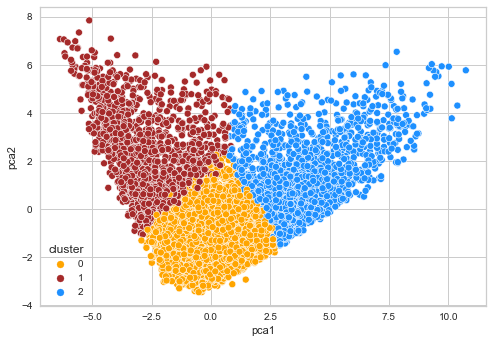

In [663]:
# Visualize the clusters in 2-axes plane
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette=['orange','brown','dodgerblue'])
plt.show()

In [664]:
pca_df

,pca1,pca2,cluster
0,-0.941247,-2.295545,0
1,-4.028068,3.790458,1
2,1.074003,0.451749,0
3,-0.044838,-0.123686,0
4,-1.463084,-1.433750,0
...,...,...,...
8049,0.378032,-1.316974,0
8050,1.023510,-2.282864,0
8051,0.787280,-2.067607,0
8052,0.176422,-2.587704,0


## 4. Factor Analysis

In [665]:
x = clean_df.copy()
x = x.drop(columns = ['labels'])

In [666]:
chi_square_value, p_value = calculate_bartlett_sphericity(x)
chi_square_value, p_value #statistically significant

(272392.99982558534, 0.0)

In [667]:
kmo_all,kmo_model=calculate_kmo(x)
print(kmo_model) 
len(kmo_all)

0.7182304099928228


21

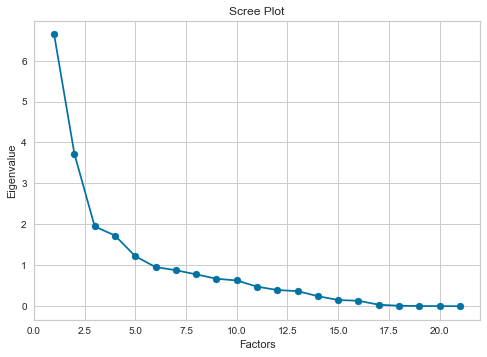

In [668]:
fa = FactorAnalyzer()
fa.fit(x, 19)

#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev

#plot eigenvector values
plt.scatter(range(1,x.shape[1]+1),ev)
plt.plot(range(1,x.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()
#Use 3 factors here since the drop is huge on 3 factors onwards

In [669]:
fa = FactorAnalyzer(n_factors=3,rotation='varimax')
fa.fit(x)
loads = fa.loadings_
print(pd.DataFrame(fa.loadings_,index=x.columns))

                                         0         1         2
BALANCE                           0.696003  0.169141 -0.061542
BALANCE_FREQUENCY                 0.296007  0.186387  0.189604
PURCHASES                        -0.130405  0.856407  0.449131
ONEOFF_PURCHASES                 -0.126198  0.967249 -0.033047
INSTALLMENTS_PURCHASES           -0.070514  0.218330  0.898370
CASH_ADVANCE                      0.837402 -0.051176 -0.147748
PURCHASES_FREQUENCY              -0.300709  0.328096  0.681864
ONEOFF_PURCHASES_FREQUENCY       -0.145110  0.726205  0.046934
PURCHASES_INSTALLMENTS_FREQUENCY -0.215301  0.066480  0.827596
CASH_ADVANCE_FREQUENCY            0.775354 -0.101420 -0.188131
CASH_ADVANCE_TRX                  0.741291 -0.080450 -0.146776
PURCHASES_TRX                    -0.128693  0.557814  0.583053
CREDIT_LIMIT                      0.194209  0.336737  0.051447
PAYMENTS                          0.290249  0.369149  0.103799
MINIMUM_PAYMENTS                  0.262619  0.006032  0

In [670]:
#Factor 1: ['PURCHASES', 'ONEOFF_PURCHASES', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_TRX', 'avg_monthly_purchase']
factor_1 = pd.DataFrame(fa.loadings_,index=x.columns)
factor_1 = factor_1[factor_1[0] >= 0.6]
#factor_1

#Factor 2: ['BALANCE', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'avg_monthly_cash'],
factor_2 = pd.DataFrame(fa.loadings_,index=x.columns)
factor_2 = factor_2[factor_2[1] >= 0.6]
#factor_2

#Factor 3: ['INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_TRX'],
factor_3 = pd.DataFrame(fa.loadings_,index=x.columns)
factor_3 = factor_3[factor_3[2] >= 0.6]
#factor_3

In [671]:
factor_1.index

Index(['BALANCE', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
       'avg_monthly_cash'],
      dtype='object')

In [672]:
#Create the factors
factor1 = x[factor_1.index]
factor2 = x[factor_2.index]
factor3 = x[factor_3.index]

#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)
print(factor1_alpha, factor2_alpha, factor3_alpha)
#Factor 3 isnt as useful compared to factors 1 and 2

(0.46896809588835325, array([0.45 , 0.487])) (0.6690783165808961, array([0.657, 0.681])) (0.1932737399462277, array([0.164, 0.222]))


In [673]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2
Variance          3.869577  3.785152  3.739219
Proportional Var  0.184266  0.180245  0.178058
Cumulative Var    0.184266  0.364511  0.542569


In [674]:
# Communality is the proportion of each variable’s variance 
# that can be explained by the factors. Rotations don’t have any influence over the communality of the variables.
print(pd.DataFrame(fa.get_communalities(), index=x.columns, columns=['Communalities']))

                                  Communalities
BALANCE                                0.516816
BALANCE_FREQUENCY                      0.158309
PURCHASES                              0.952157
ONEOFF_PURCHASES                       0.952588
INSTALLMENTS_PURCHASES                 0.859708
CASH_ADVANCE                           0.725691
PURCHASES_FREQUENCY                    0.663012
ONEOFF_PURCHASES_FREQUENCY             0.550633
PURCHASES_INSTALLMENTS_FREQUENCY       0.735689
CASH_ADVANCE_FREQUENCY                 0.646853
CASH_ADVANCE_TRX                       0.577528
PURCHASES_TRX                          0.667669
CREDIT_LIMIT                           0.153756
PAYMENTS                               0.231289
MINIMUM_PAYMENTS                       0.069078
PRC_FULL_PAYMENT                       0.158618
TENURE                                 0.021671
avg_monthly_purchase                   0.931987
avg_monthly_cash                       0.692577
avg_monthly_installments               0

In [680]:
numerical_features = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "INSTALLMENTS_PURCHASES", #"CREDIT_LIMIT",
                      'ONEOFF_PURCHASES', 'PAYMENTS','labels']

frequency_features = ['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 
                      'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 
                      'labels']

## 5. Behavioural Analysis

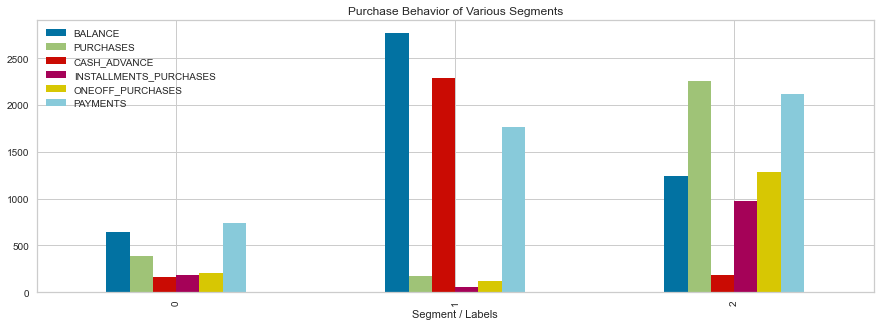

In [681]:
clean_df[numerical_features].groupby(['labels']).mean().plot.bar(figsize = (15,5))
plt.title('Purchase Behavior of Various Segments')
plt.xlabel('Segment / Labels');
plt.show()

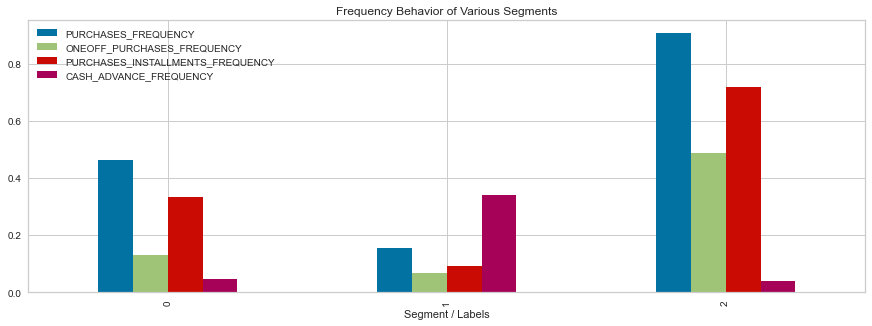

In [682]:
clean_df[frequency_features].groupby("labels").mean().plot.bar(figsize=(15, 5))
plt.title('Frequency Behavior of Various Segments')
plt.xlabel('Segment / Labels');
plt.show()

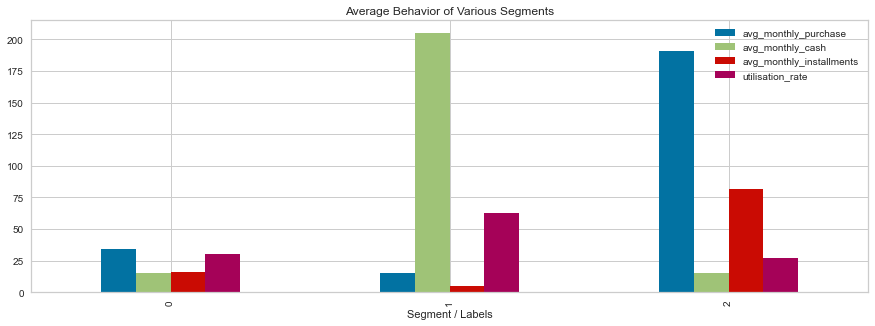

In [683]:
#'avg_monthly_payments' either way if they use the card, they'll make payments
analysis_df = clean_df.copy()
analysis_df['utilisation_rate'] = analysis_df['utilisation_ratio'] * 100

analysis_df[['avg_monthly_purchase', 'avg_monthly_cash', 'avg_monthly_installments',
             'utilisation_rate', 'labels']].groupby("labels").mean().plot.bar(figsize=(15, 5))
plt.title('Average Behavior of Various Segments')
plt.xlabel('Segment / Labels');
plt.show()

## 6. Multinomial Logistic Regression & Discriminant Analysis

In [684]:
X = clean_df.copy()
y = X['labels']
X = X.drop(columns = ['labels'])

In [685]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

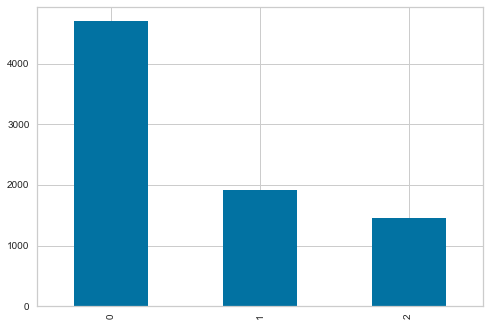

In [686]:
y.value_counts().plot(kind = 'bar')
plt.show()

In [687]:
lr_model = make_pipeline(StandardScaler(), LogisticRegression(multi_class='auto', random_state = 0))
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

Accuracy:  0.9962763756723211
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1412
           1       1.00      1.00      1.00       575
           2       1.00      0.99      0.99       430

    accuracy                           1.00      2417
   macro avg       1.00      0.99      1.00      2417
weighted avg       1.00      1.00      1.00      2417



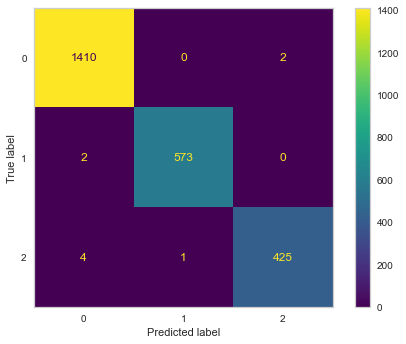

In [688]:
print('Accuracy: ', accuracy_score(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))
cm = confusion_matrix(y_test, lr_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lr_model.classes_)
disp.plot()
plt.grid(False)
plt.show()

In [689]:
lr_coef = pd.DataFrame(lr_model.named_steps['logisticregression'].coef_, columns = X.columns).T
lr_bias = pd.DataFrame(lr_model.named_steps['logisticregression'].intercept_, columns = ['Bias']).T
lr_weights = pd.concat([lr_coef, lr_bias], axis = 0)
lr_weights.round(3)

,0,1,2
BALANCE,-1.547,1.877,-0.330
BALANCE_FREQUENCY,-0.934,0.453,0.480
PURCHASES,-1.170,-1.654,2.824
ONEOFF_PURCHASES,-0.830,-1.144,1.974
INSTALLMENTS_PURCHASES,-1.035,-1.498,2.533
CASH_ADVANCE,-1.783,2.926,-1.143
PURCHASES_FREQUENCY,0.199,-2.144,1.945
ONEOFF_PURCHASES_FREQUENCY,-0.799,-1.311,2.109
PURCHASES_INSTALLMENTS_FREQUENCY,-0.304,-1.629,1.933
CASH_ADVANCE_FREQUENCY,-1.476,2.986,-1.510


In [690]:
X_train1 = np.array(X_train)
y_train1 = np.array(y_train)

lda_model = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())
lda_model.fit(X_train1, y_train1)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis())])

In [691]:
lda_coef = pd.DataFrame(lda_model.named_steps['lineardiscriminantanalysis'].coef_, columns = X.columns).T
lda_bias = pd.DataFrame(lda_model.named_steps['lineardiscriminantanalysis'].intercept_, columns = ['Bias']).T
lda_weights = pd.concat([lda_coef, lda_bias], axis = 0)
lda_weights.round(3)

,0,1,2
BALANCE,-0.214,0.862,-0.441
BALANCE_FREQUENCY,-0.164,0.238,0.218
PURCHASES,-2.729,0.937,7.566
ONEOFF_PURCHASES,1.933,-0.790,-5.193
INSTALLMENTS_PURCHASES,0.871,-0.916,-1.605
CASH_ADVANCE,0.155,0.273,-0.857
PURCHASES_FREQUENCY,0.833,-0.305,-2.285
ONEOFF_PURCHASES_FREQUENCY,-0.434,-0.485,2.035
PURCHASES_INSTALLMENTS_FREQUENCY,-0.469,-0.293,1.894
CASH_ADVANCE_FREQUENCY,-0.683,1.857,-0.231


In [692]:
X_test1 = np.array(X_test)
y_test1 = np.array(y_test)

lda_y_pred = lda_model.predict(X_test1)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1412
           1       0.98      0.85      0.91       575
           2       0.99      0.83      0.90       430

    accuracy                           0.93      2417
   macro avg       0.96      0.89      0.92      2417
weighted avg       0.93      0.93      0.93      2417

0.9296648738105089


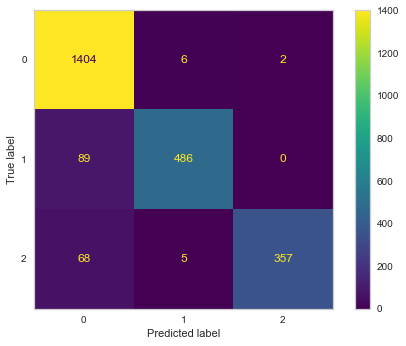

In [693]:
print(classification_report(y_test1, lda_y_pred))
print(accuracy_score(y_test1, lda_y_pred))
cm = confusion_matrix(y_test, lda_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = lda_model.classes_)
disp.plot()
plt.grid(False)
plt.show()